<a href="https://colab.research.google.com/github/allenphos/Mid-term-Project/blob/main/Another_of_Mid_term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Прогнозування оформлення строкових депозитів

У цьому дослідженні розроблено модель машинного навчання для прогнозування ймовірності оформлення строкових депозитів клієнтами банку. Таке прогнозування є актуальним завданням для фінансових установ, оскільки дозволяє оптимізувати маркетингові стратегії та підвищити ефективність роботи з клієнтами.

Для побудови моделі використано набір даних, що містить інформацію про попередні маркетингові кампанії банку. Дані включають демографічні характеристики клієнтів, їхню історію взаємодії з банком, а також соціально-економічні показники. Застосовано різні методи машинного навчання, такі як логістична регресія, метод K-найближчих сусідів, дерева рішень та алгоритми бустингу.

Для виконання завдання використовувался набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], і можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

Проведено ретельний аналіз даних з метою виявлення факторів, що впливають на рішення клієнта щодо оформлення строкового депозиту. Оптимізовано гіперпараметри моделі для досягнення максимальної точності прогнозування.

Розроблена модель може бути використана банком для прогнозування ймовірності оформлення строкових депозитів потенційними клієнтами. Такий прогноз дозволить банку персоналізувати маркетингові пропозиції та підвищити ймовірність успішного залучення клієнтів.

# Imports

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

pd.set_option('float_format', '{:.2f}'.format)

In [275]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/bank-additional-full.csv", delimiter=";")

# 1. Exploratory Data Analysis

In [142]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [ ]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


## Categorical values

In [ ]:
df.select_dtypes(include=['object']).nunique()

,0
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3


In [ ]:
len(df.select_dtypes(include = "object").columns)

11

In [ ]:
len(df.select_dtypes(include="number").columns)

10

В наборі даних 10 числових і 11 категоріальних колонок з них:
- 1 бінарна: contact (cellular, telephone)
- 3 мультикатегоріальних, які мають yes, no, unknown значення: default, housing, loan
- 5 мультикатегоріальних (більше 3х значень) зі значеннями, для яких немає відношення порядку: job, marital, education, month, day_of_week
- 1 колонка ordinal: poutcome

In [ ]:
df.isnull().values.sum()

np.int64(0)

In [ ]:
df['y'].value_counts(normalize = True) * 100

,proportion
y,
no,88.73
yes,11.27


Univariate (categorical vs. target) and bivariate (categorical vs. categorical) analysis (histogram) - categorical columns

In [276]:
def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='y' )


def bi_countplot_target(df1, column, hue_column):
  bi_cat_countplot(df1, column, hue_column)
  plt.show()


In [281]:
def one_cat_countplot(df, column, hue_column):
    fig, ax = plt.subplots(figsize=(18, 12))

    pltname = 'Нормалізований розподіл значень за age'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
    ).plot.bar(ax=ax, title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

The normalized distribution of values (Нормалізований розподіл значень) in bar plot shows the percentage of each category within each target class (y).

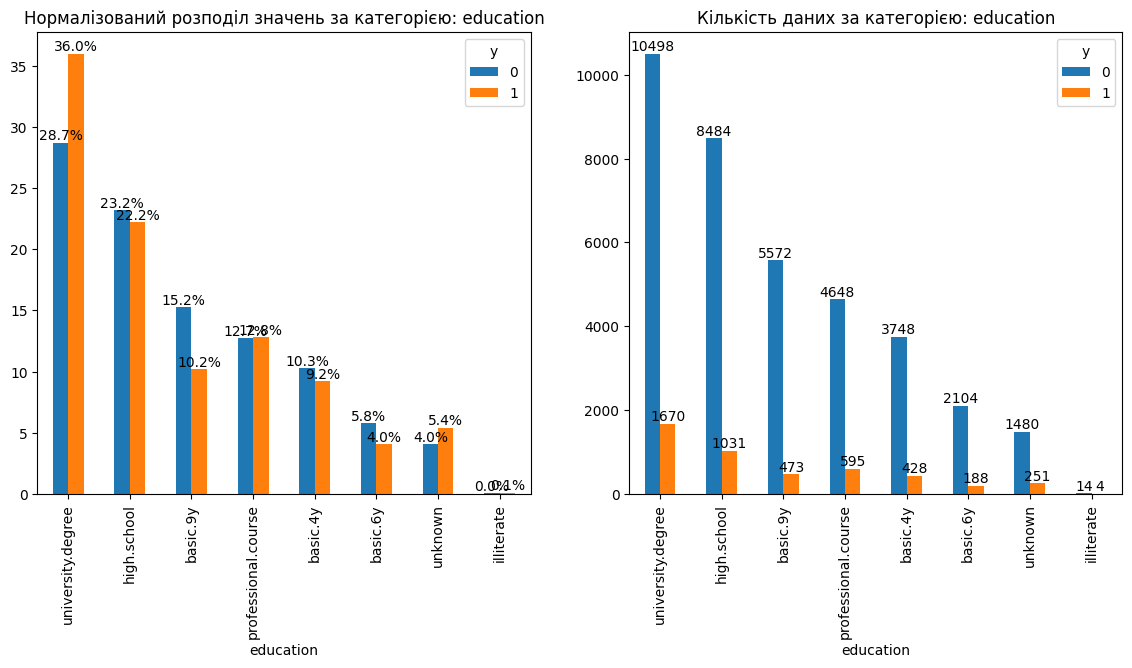

In [ ]:
uni_cat_target_compare(df, 'education')

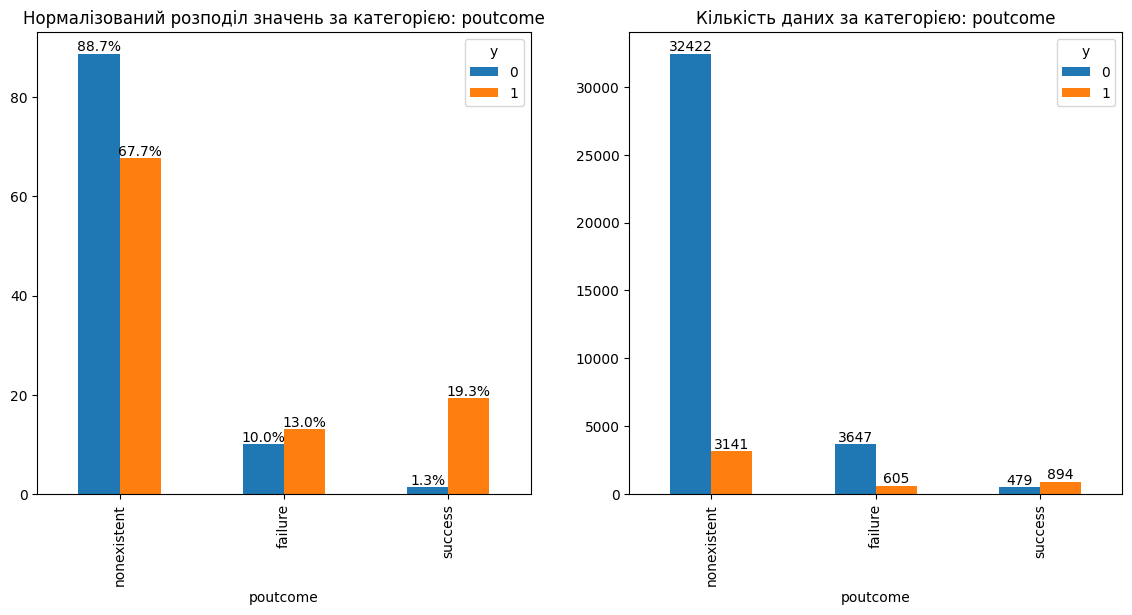

In [ ]:
uni_cat_target_compare(df, 'poutcome')

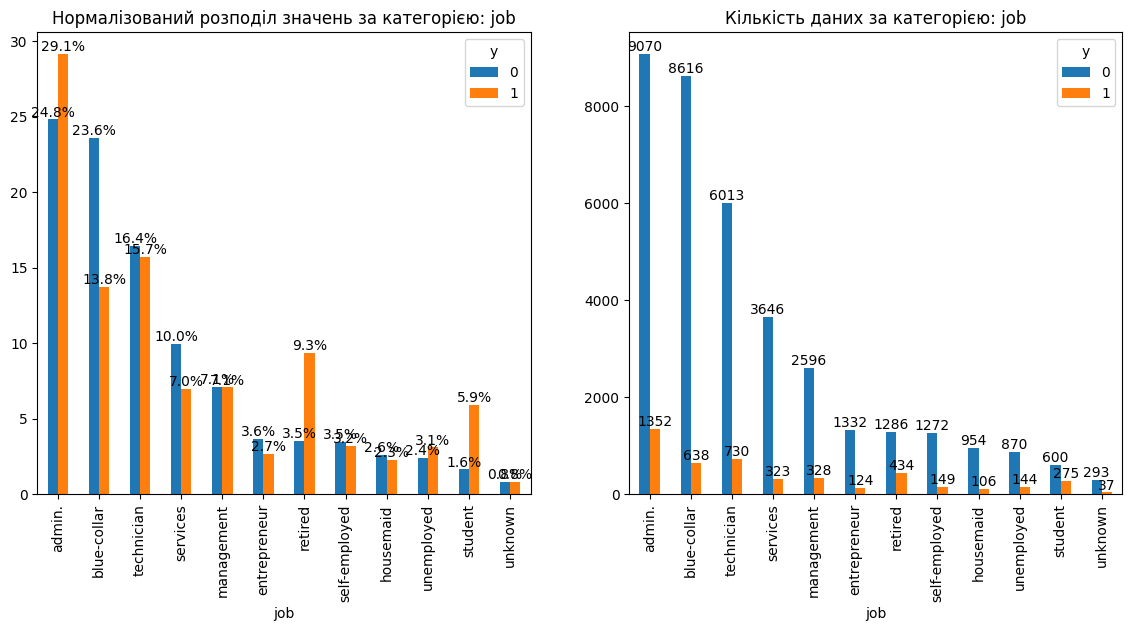

In [ ]:
uni_cat_target_compare(df, 'job')

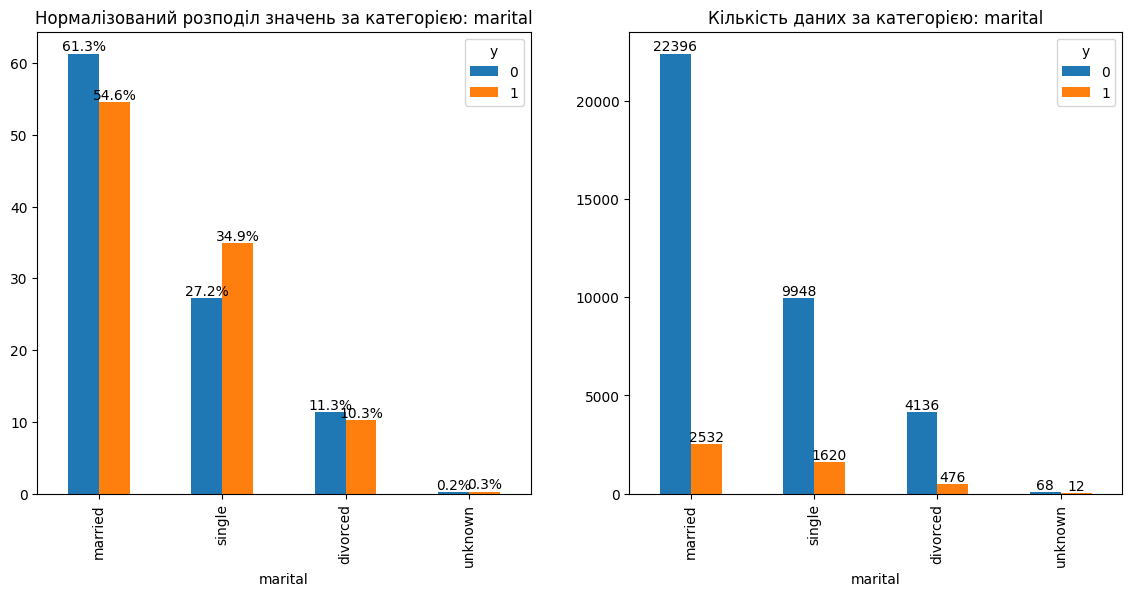

In [ ]:
uni_cat_target_compare(df, 'marital')

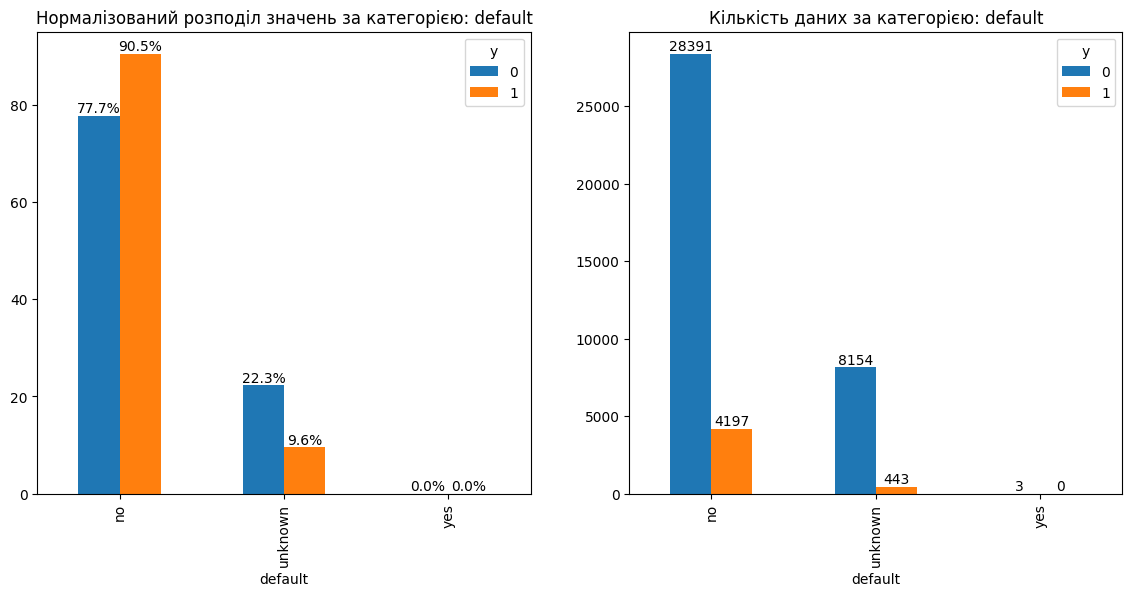

In [ ]:
uni_cat_target_compare(df, 'default')

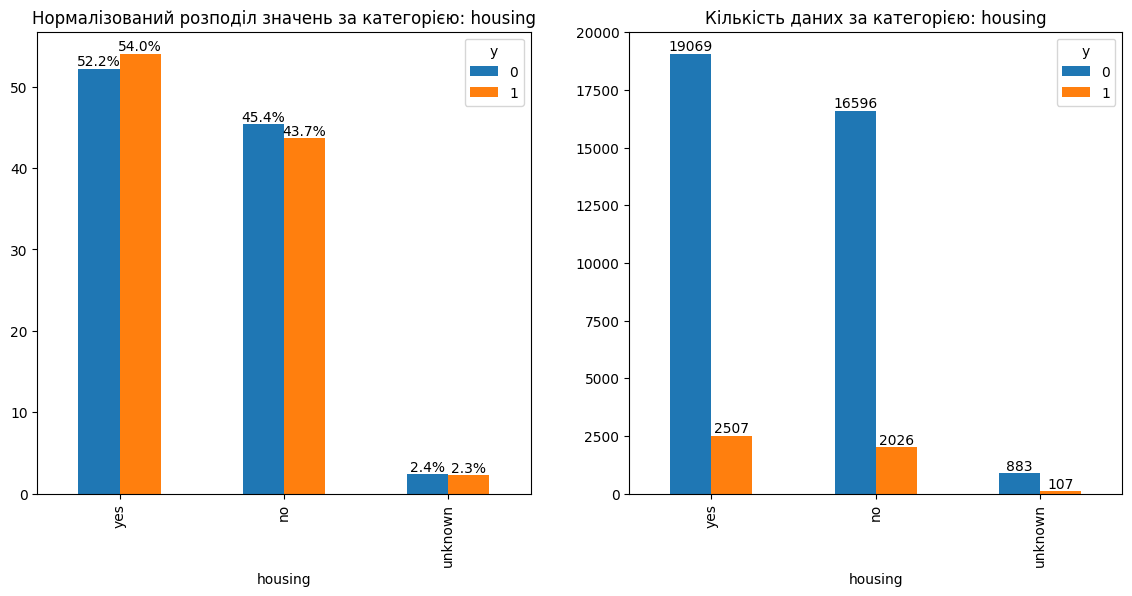

In [ ]:
uni_cat_target_compare(df, 'housing')

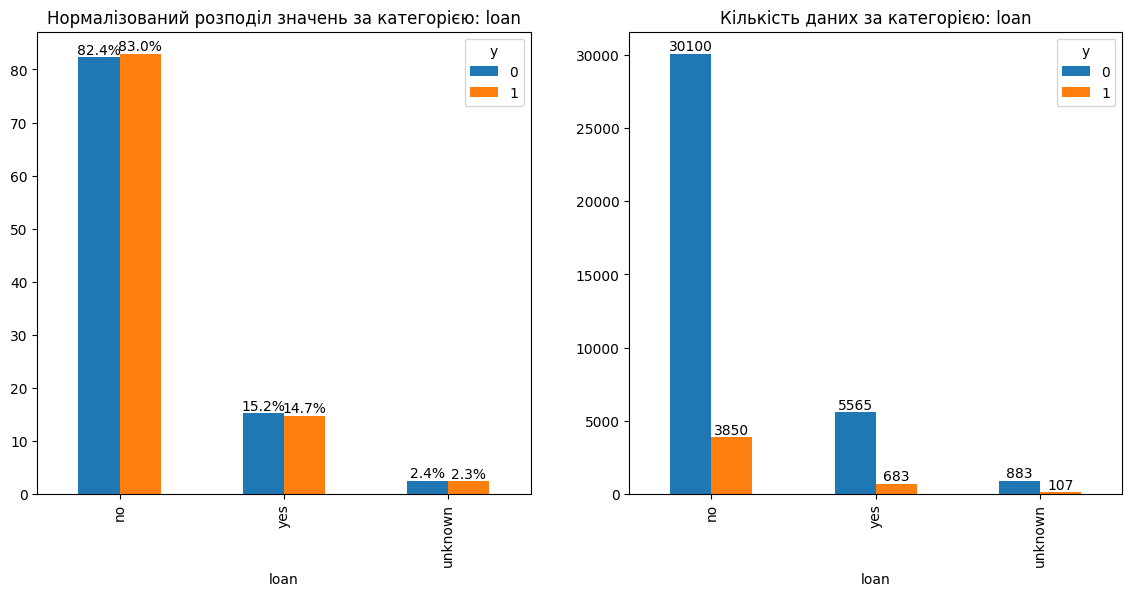

In [ ]:
uni_cat_target_compare(df, 'loan')

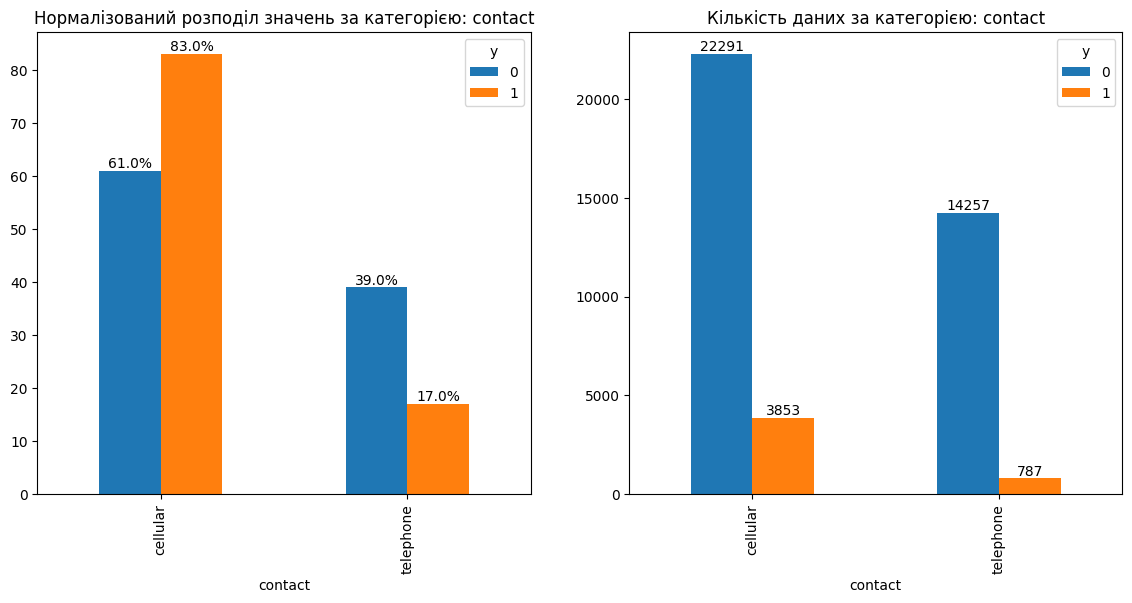

In [ ]:
uni_cat_target_compare(df, 'contact')

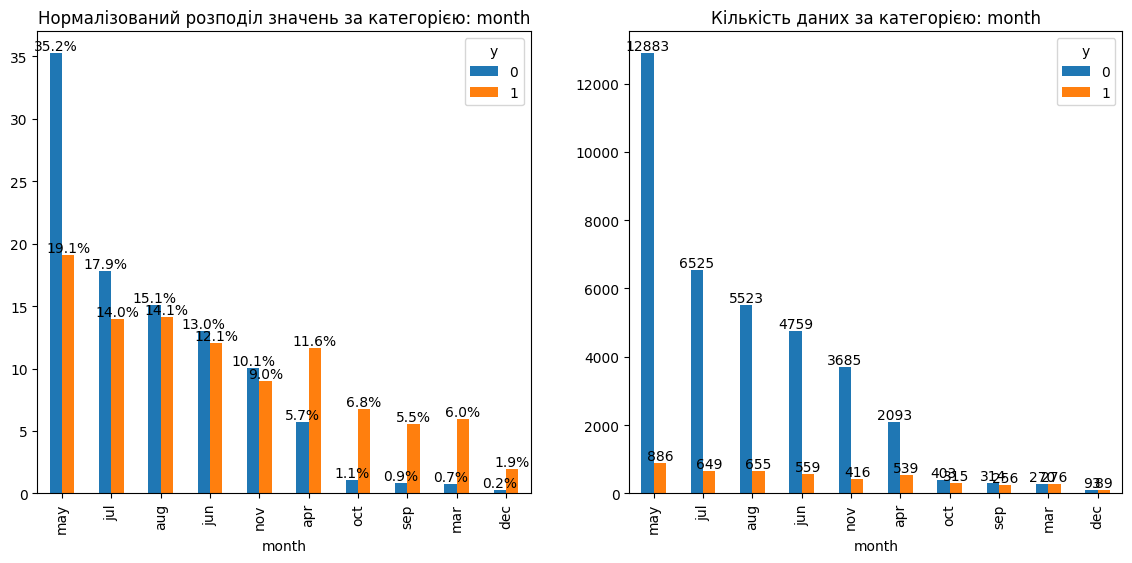

In [ ]:
uni_cat_target_compare(df, 'month')

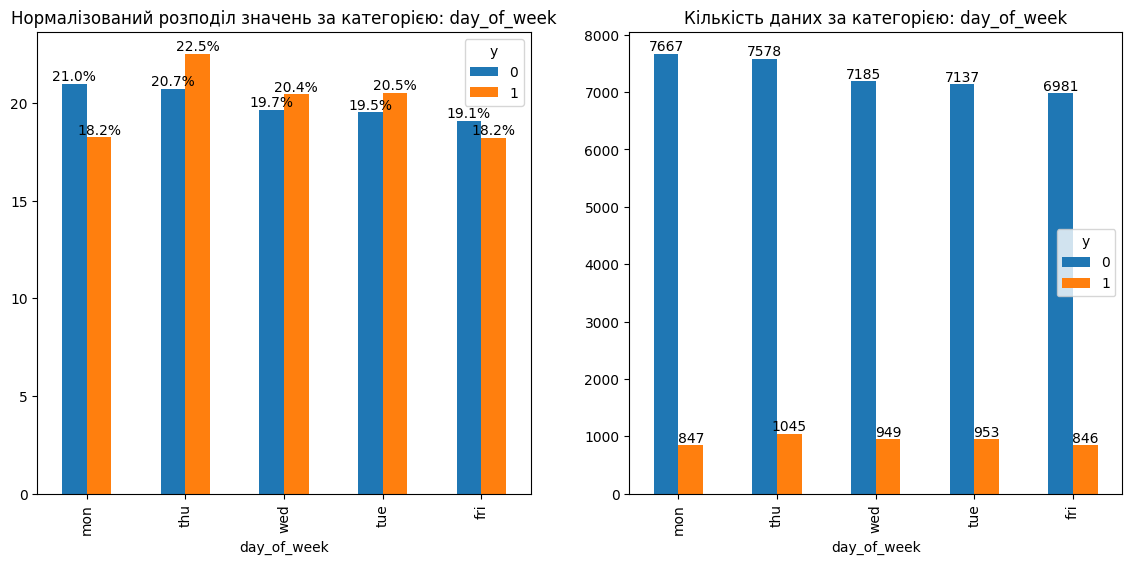

In [ ]:
uni_cat_target_compare(df, 'day_of_week')

### Analysis of distribution of univariate categorical values

Did the client sign a term deposit?


- **poutcome**: for clients with **success** in previous marketing campaign the probability of signing a term deposit is higher than for clients with failure or nonexistent in previous marketing campaign.
- **education**: for client with **university**.degree the probability of signing a term deposit is higher than for clients with other education levels.
- **job**: for clients who **admin**, retired, student the probability of signing a term deposit is much higher than for clients with other jobs, and much lower for clients who do manual labor.
- **marital**: for clients who are **single** the probability of signing a term deposit is a little higher than for clients who are married or divorced.
- **default**: for clients who **don't have a credit** in default the probability of signing a term deposit is a little higher than for clients who have a credit in default.
- **housing**: for clients who **have a housing loan** the probability of signing a term deposit is a little higher than for clients who dont have a housing loan.
- **loan**: for clients who **don't have a personal loan** the probability of signing a term deposit is a almost the same as for clients who have a personal loan.
- **contact**: for clients who were contacted by **cellular** the probability of signing a term deposit is much higher than for clients who were contacted by telephone.
- **month**: May and July are the most unfavorable months for sales, the majority of rejections occur during these months.
- **day_of_week**: Monday and Friday are unfavorable days for sales, the majority of rejections occur during these days.

**Distribution of bivariate categorical values**

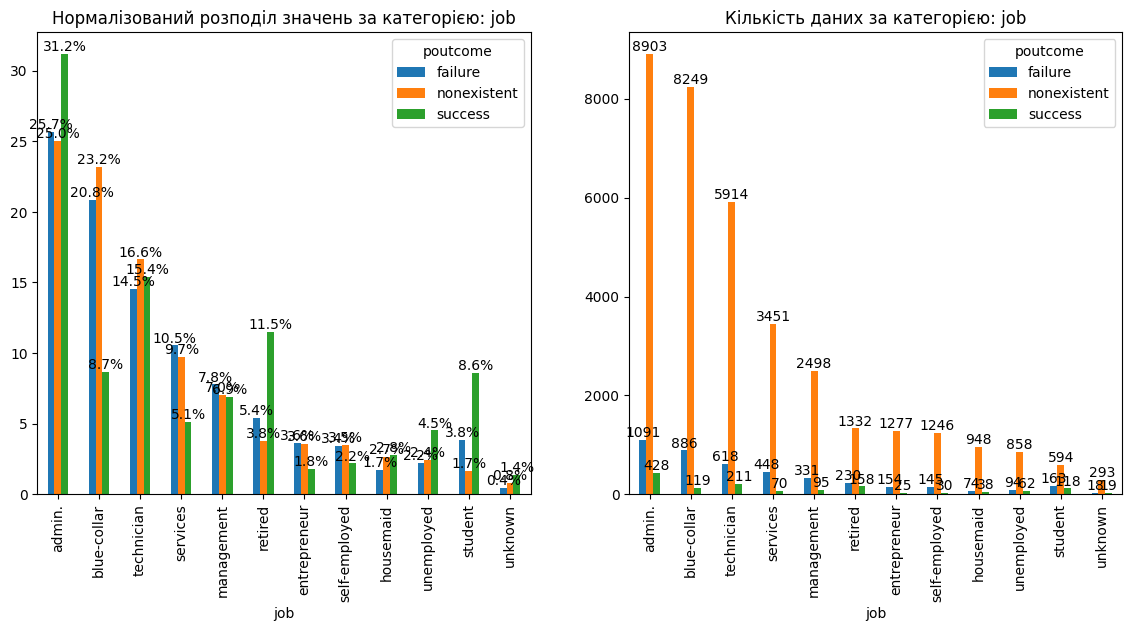

In [ ]:
bi_countplot_target(df, 'job', 'poutcome')

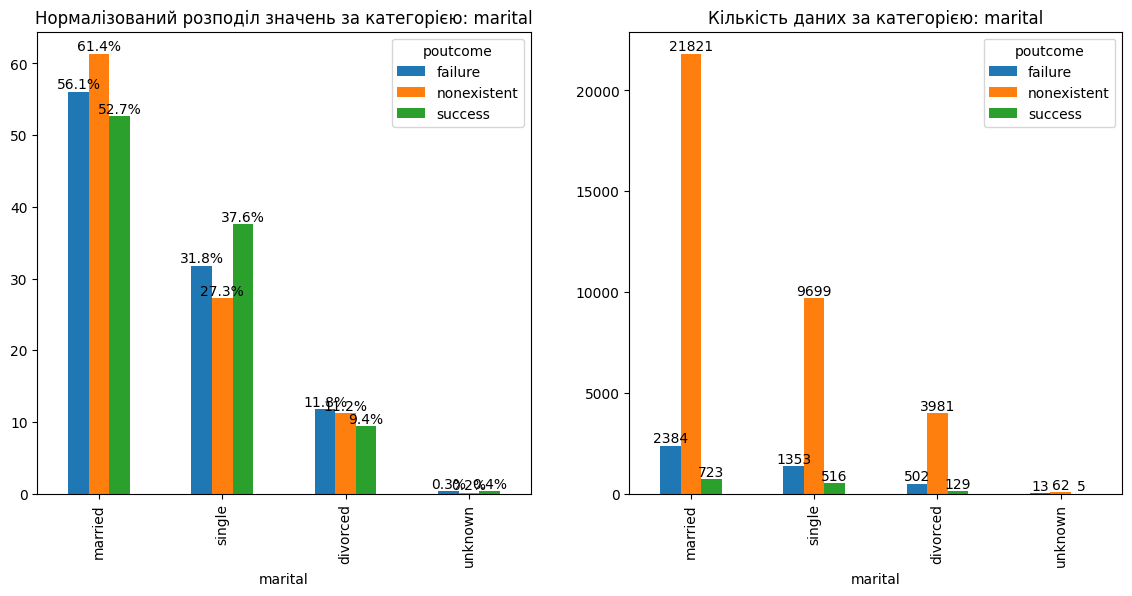

In [ ]:
bi_countplot_target(df, 'marital', 'poutcome')

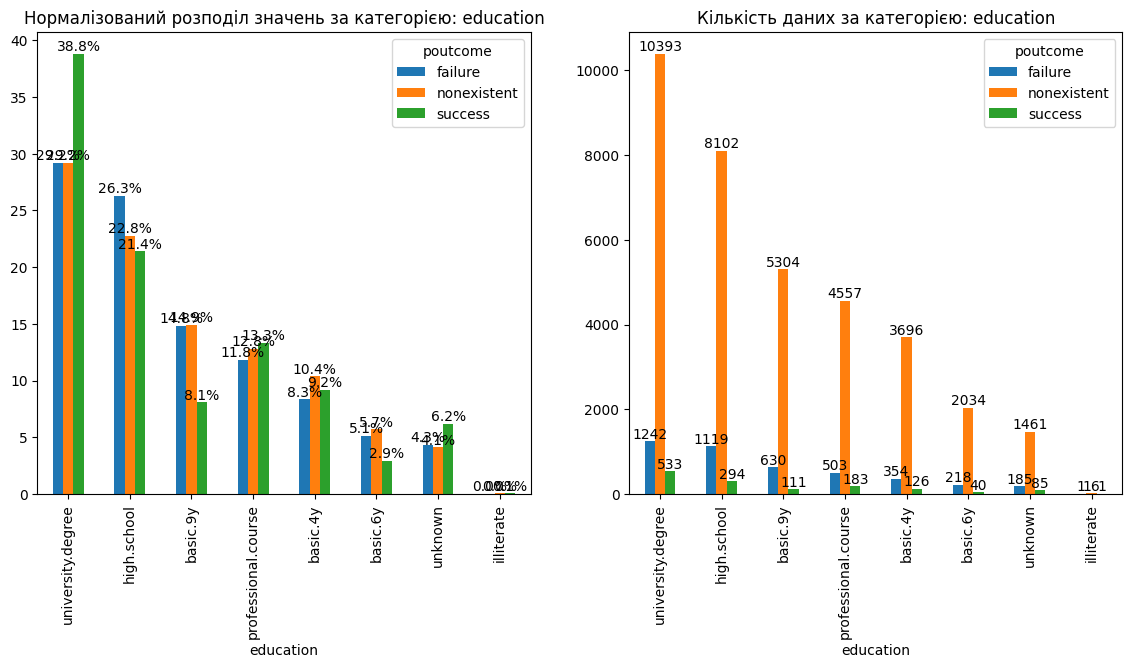

In [ ]:
bi_countplot_target(df, 'education', 'poutcome')

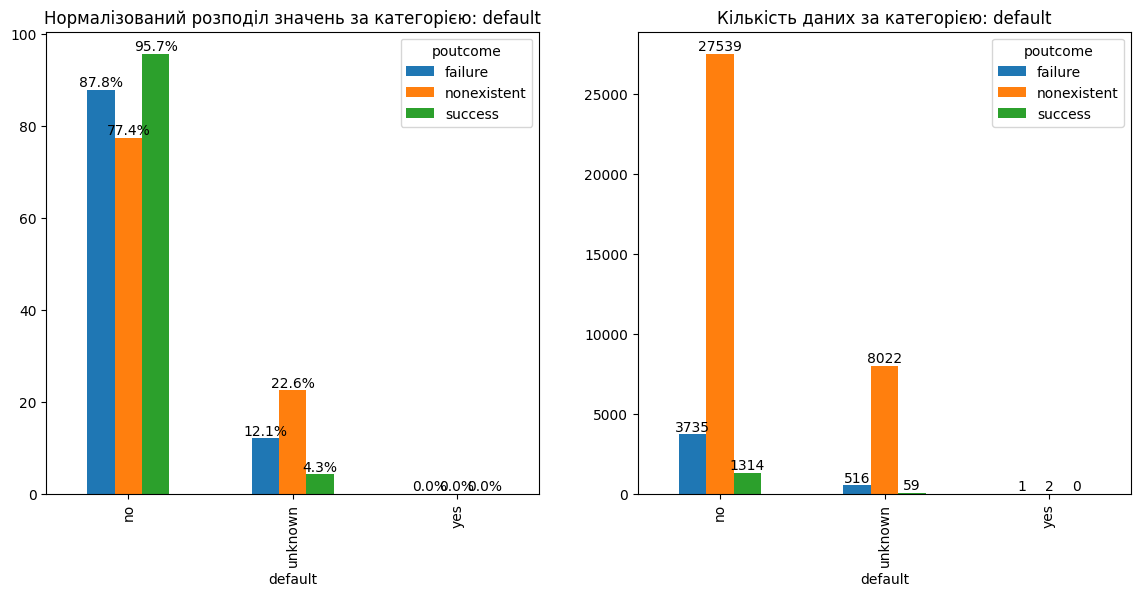

In [ ]:
bi_countplot_target(df, 'default', 'poutcome')

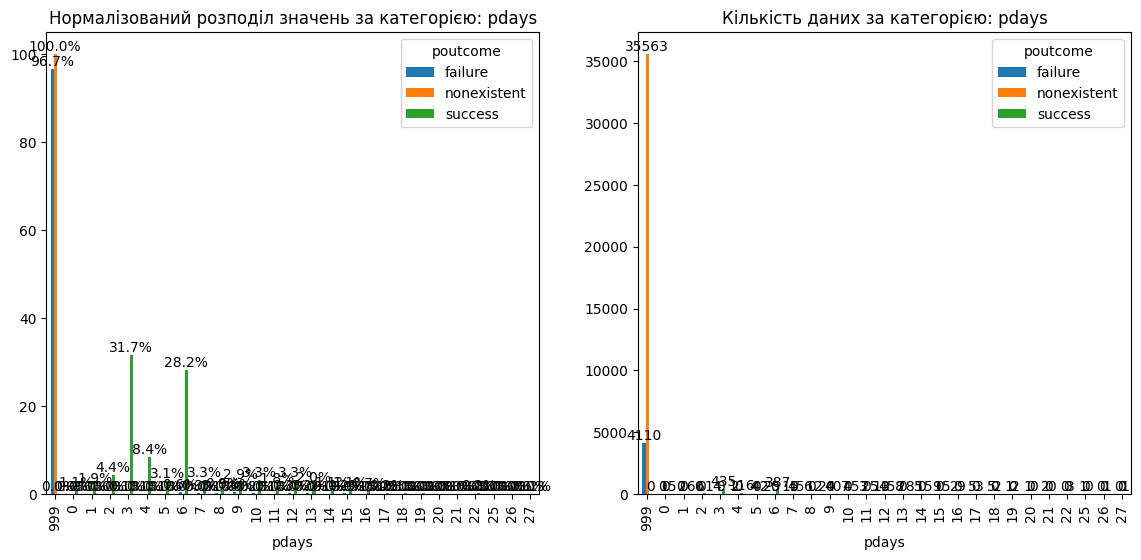

In [ ]:
bi_countplot_target(df, 'pdays', 'poutcome')

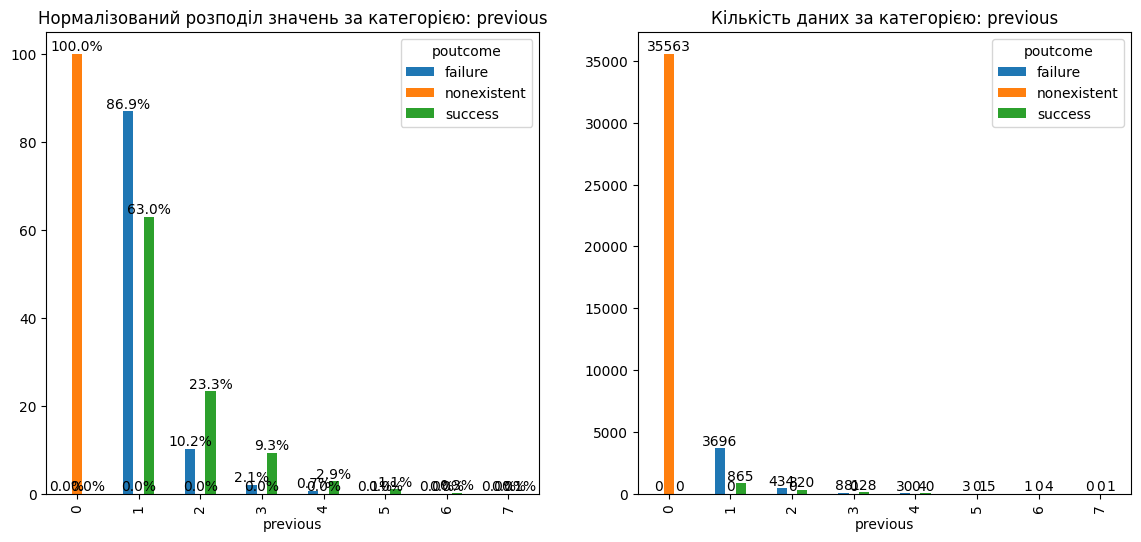

In [ ]:
bi_countplot_target(df, 'previous', 'poutcome')

#### Analysis of distribution of bivariate categorical values

poutcome:

- Clients who retired, student in university or in professional course, unemployed or have an administrative job, single, doesn't have loan of any kind - have success in previous marketing campaign more often.
- Clients who have been contacted 3 to 6 days ago (pdays) - have success in previous marketing campaign.
- If a customer has been contacted from 2 to 4 times (previous) in previous campaigns, their probability of success in the current campaign are higher.

Target variable is unevenly distributed (more no)


### Converting 'y' to numerical representation

In [103]:
for col in ['y']:
  df[col] = np.where(df[col]=='yes', 1, 0) #If the condition is False (the cell value is not 'Y'), np.where() will replace that value with 0.

## Numerical variables

Calculate the minimum and maximum deviation range for numeric columns

In [283]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

Outliers for numeric columns

In [282]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

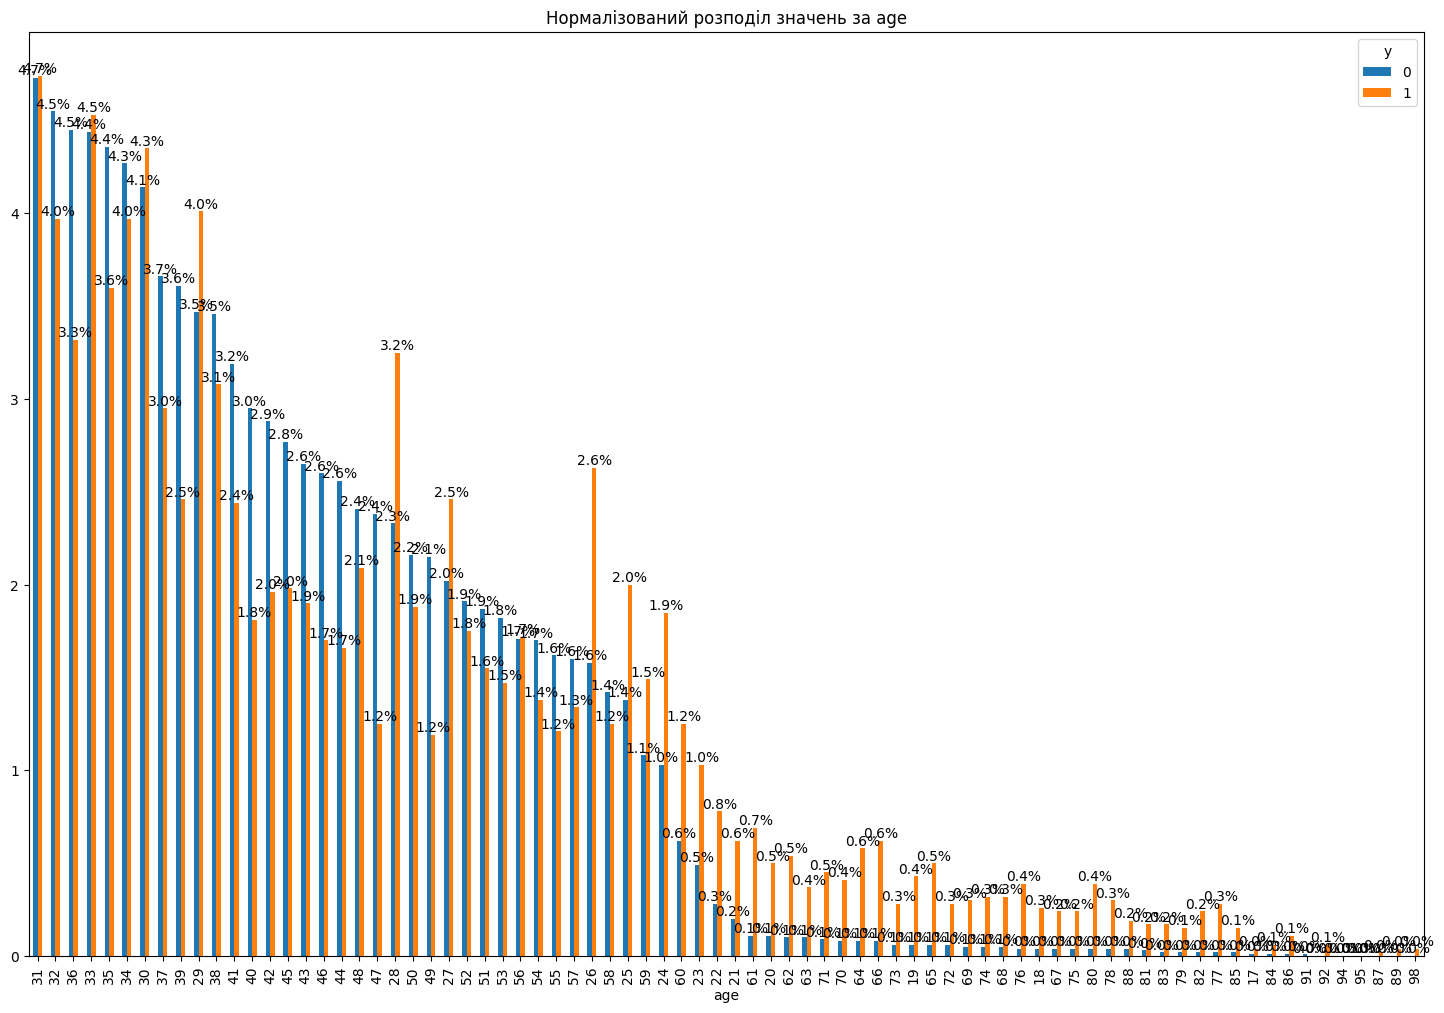

In [ ]:
one_cat_countplot(df, 'age', 'y')

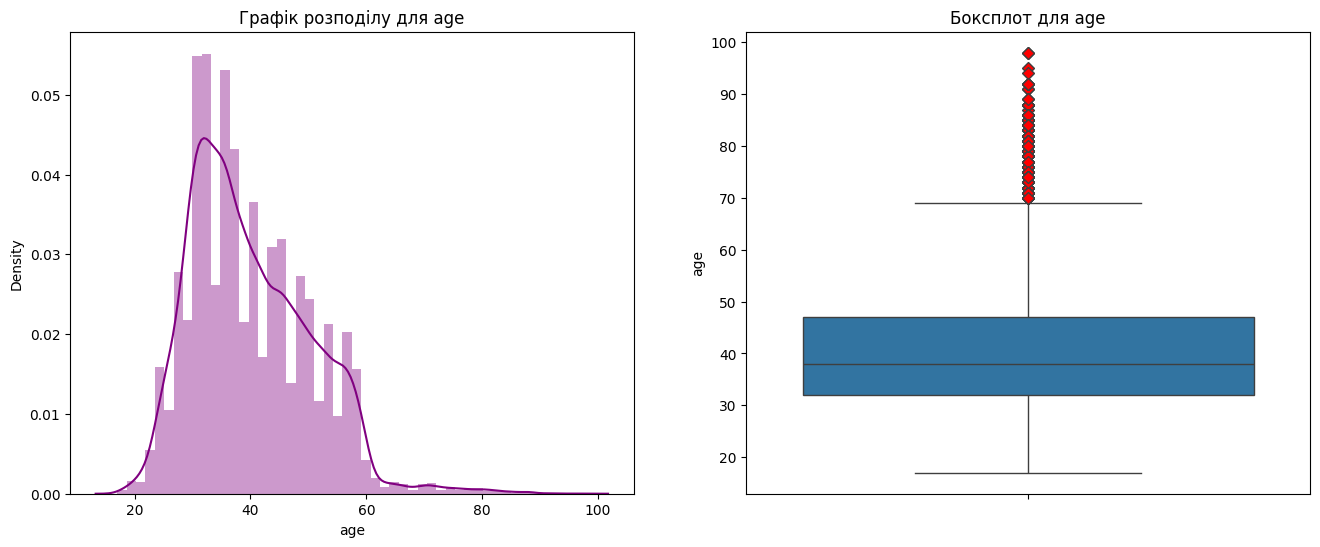

np.float64(69.5)

In [ ]:
dist_box(df, 'age')
outlier_range(df, 'age')

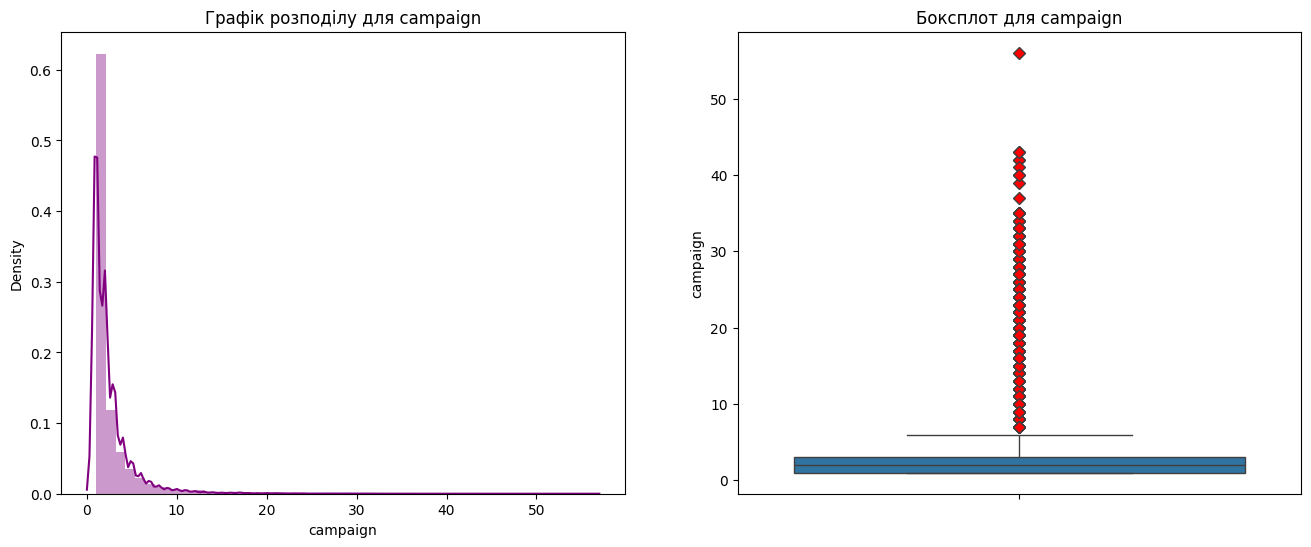

np.float64(6.0)

In [ ]:
dist_box(df, 'campaign')
outlier_range(df, 'campaign')

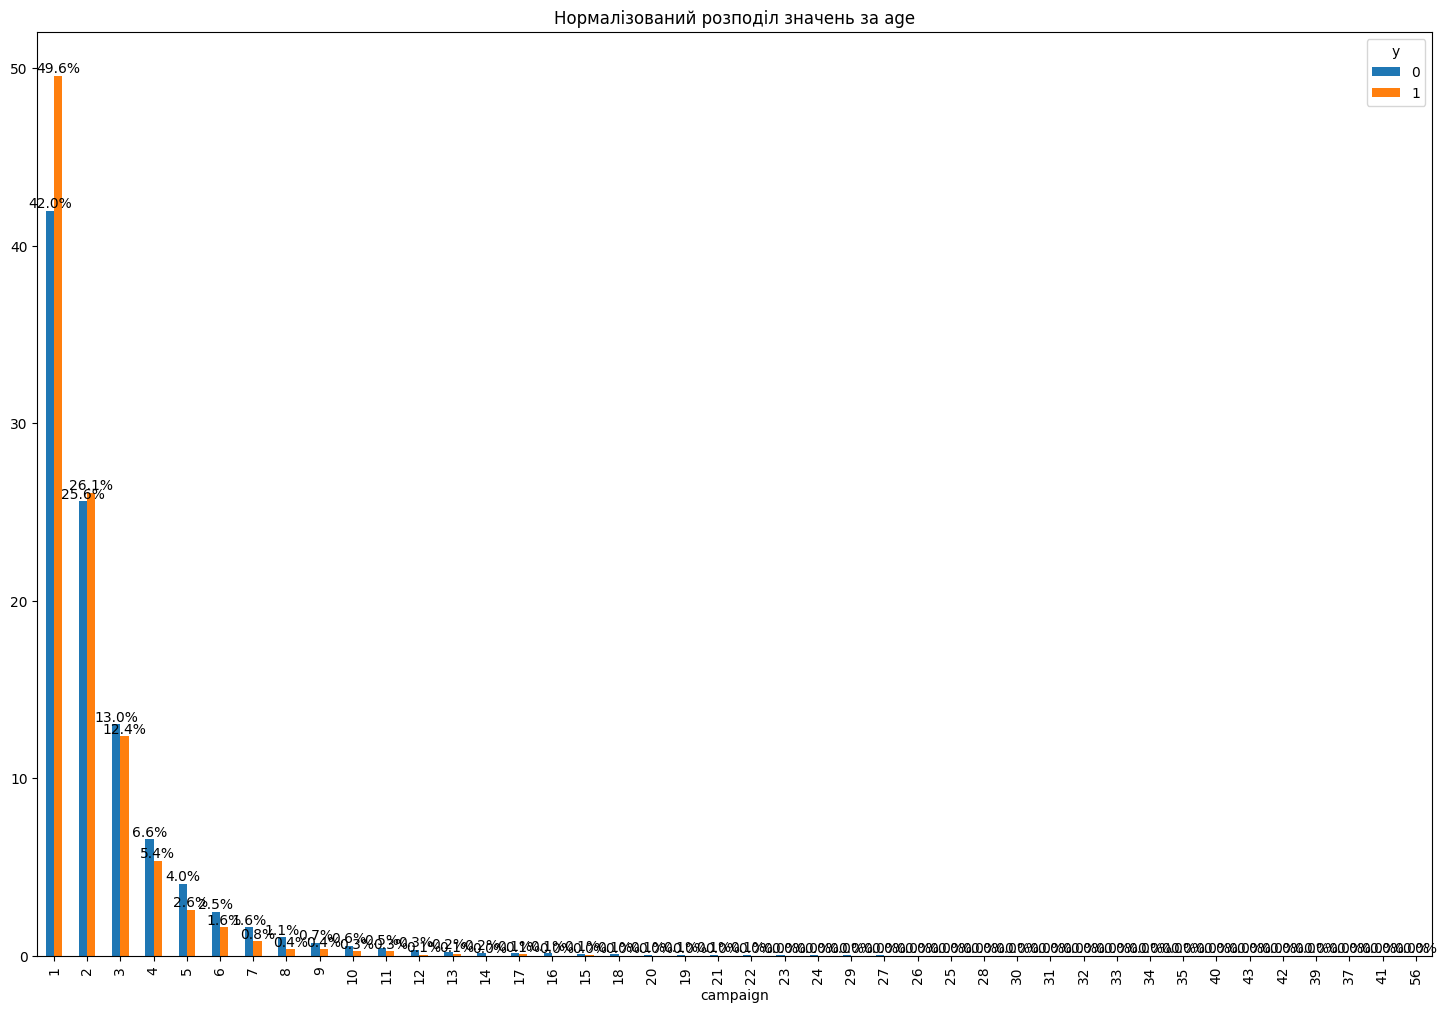

In [ ]:
one_cat_countplot(df, 'campaign', 'y')

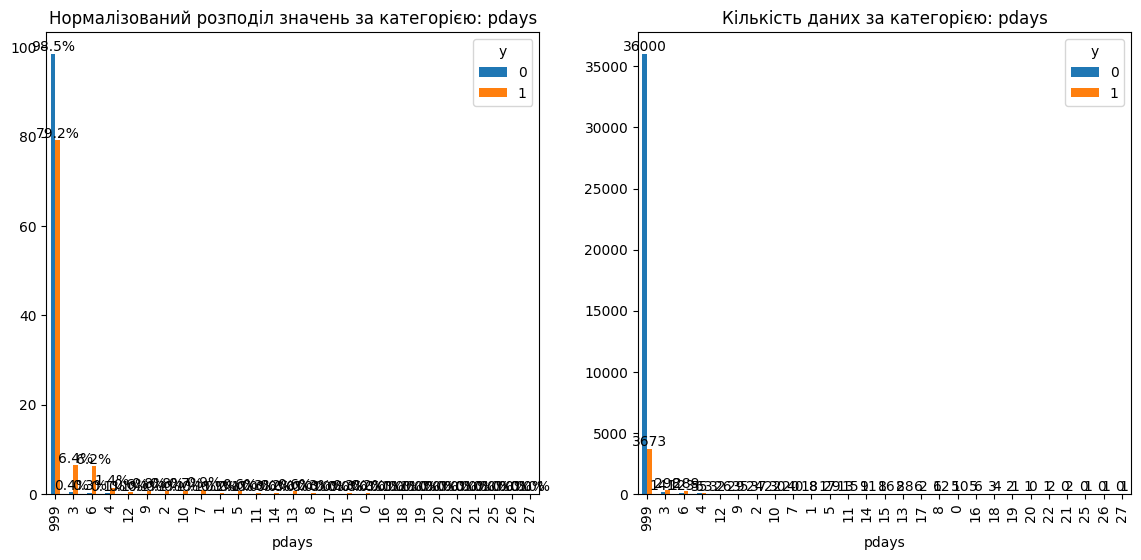

In [ ]:
uni_cat_target_compare(df, 'pdays')

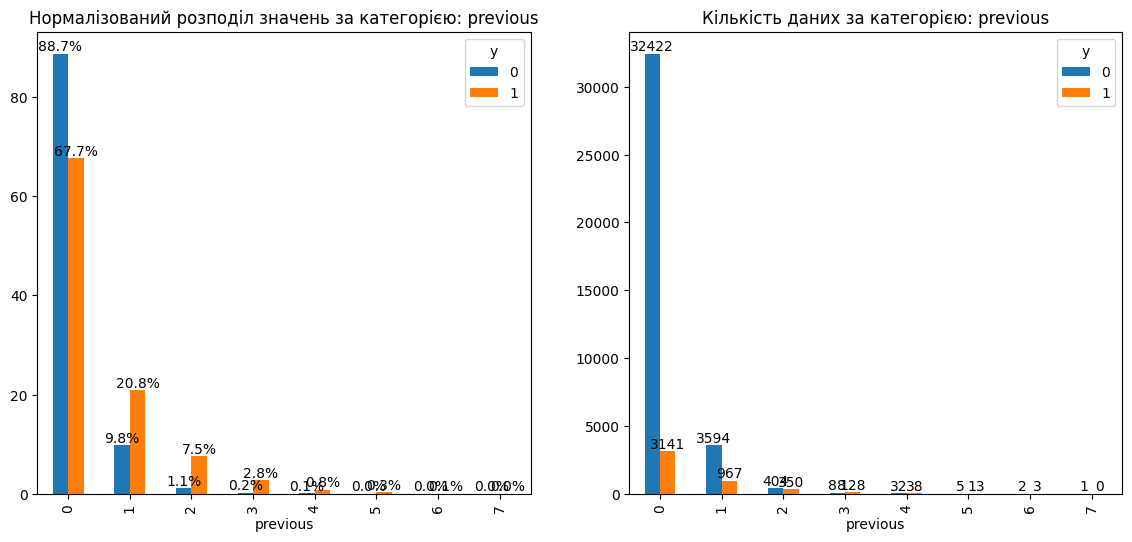

In [ ]:
uni_cat_target_compare(df, 'previous')

### Analysis of outliers and distribution of numerical variables

- **campaign** (number of contacts within the current campaign): have a lot of outliers after 6. Unlikely that a client will change his mind after 3rd contact.
- **pdays** (number of days that passed by after the client was contacted in previous campaign, 999 never contacted): if client wasn`t contacted before the probability of signing a term deposit is low. Same for **previous** (number of contacts made to this client before this campaign)

**Attributes of the socio-economic context**

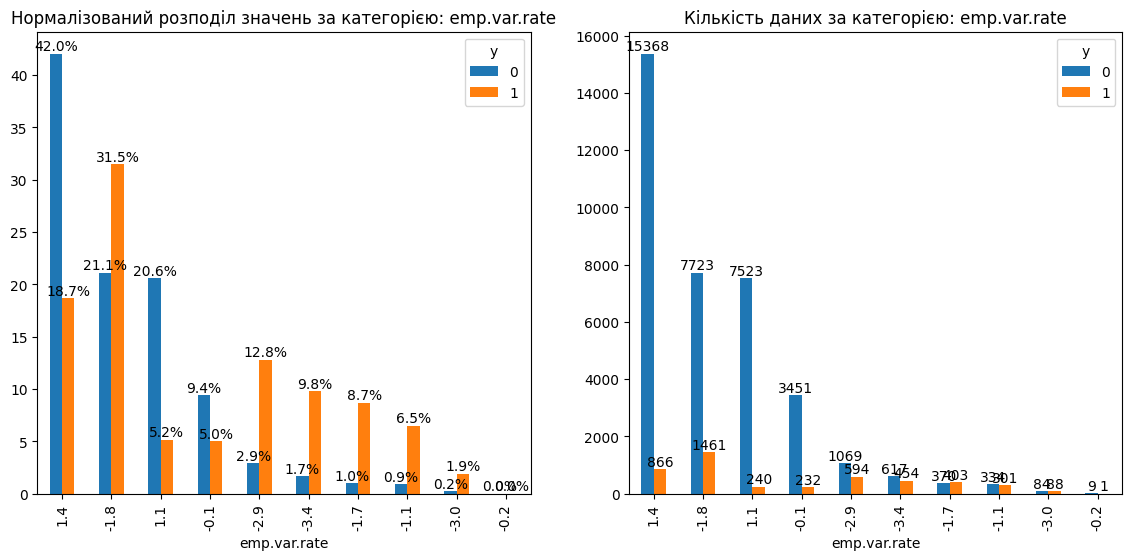

In [ ]:
uni_cat_target_compare(df, 'emp.var.rate')

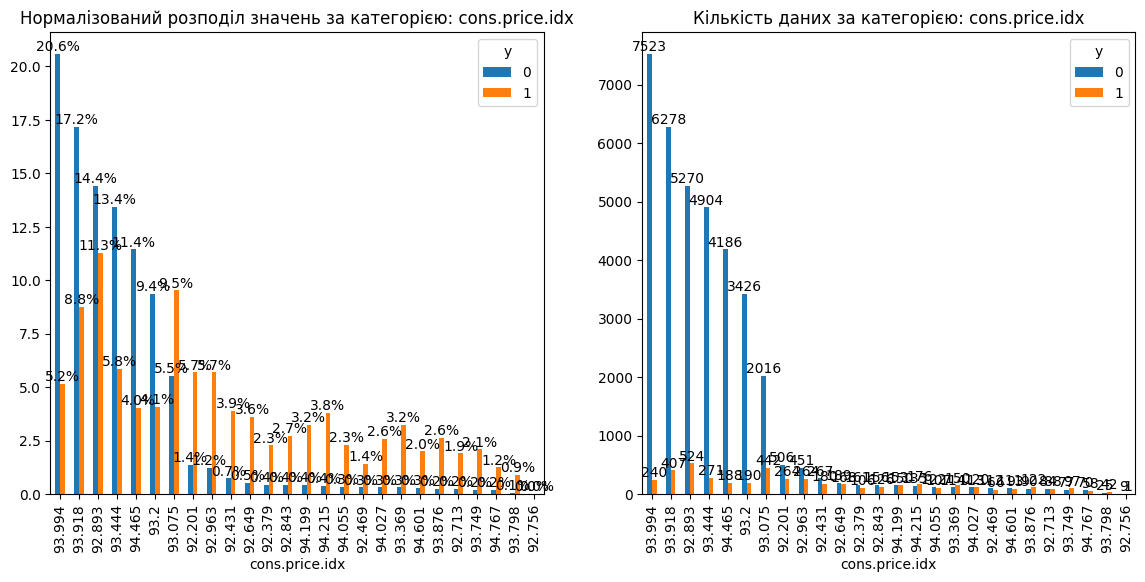

In [ ]:
uni_cat_target_compare(df, 'cons.price.idx')

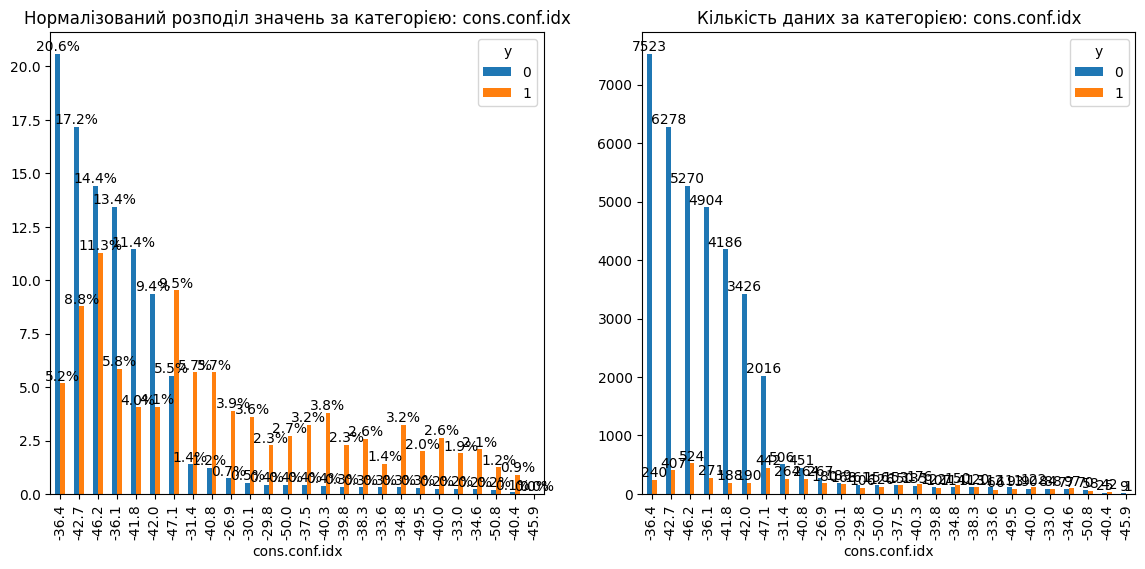

In [ ]:
uni_cat_target_compare(df, 'cons.conf.idx')

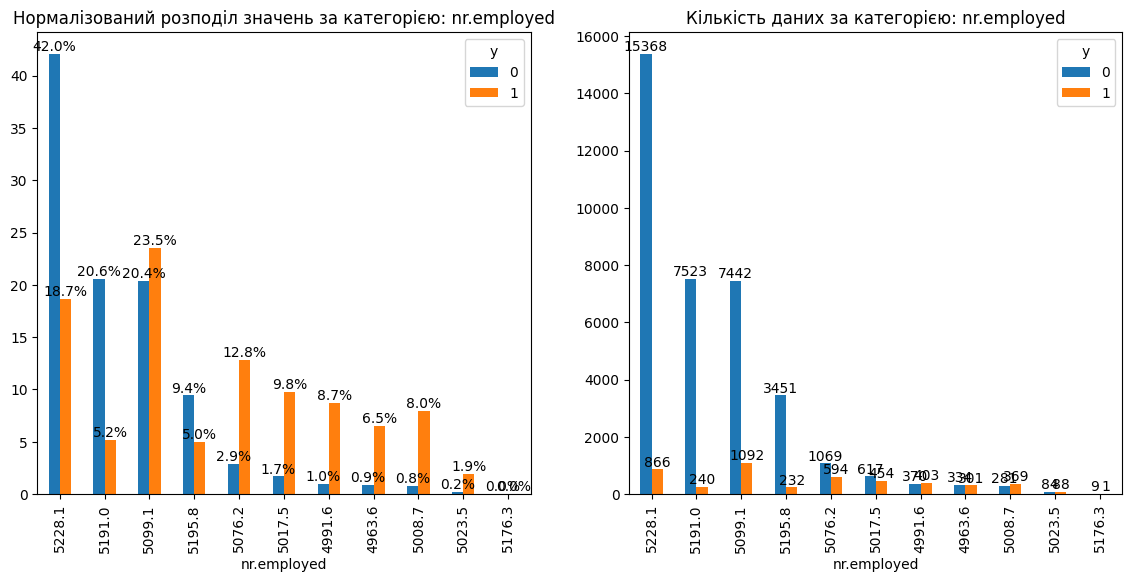

In [ ]:
uni_cat_target_compare(df, 'nr.employed')

### Analysis of attributes of the socio-economic context

1. **emp.var.rate** (темп зміни зайнятості)

- Вимірює зміну рівня зайнятості у відсотках за певний квартал.

- Високі значення → ринок праці зростає (більше людей мають роботу).

- Низькі/від’ємні значення → зростає безробіття.

Якщо зростає безробіття - більше шанс отримати кредит.

2. cons.price.idx (індекс споживчих цін) - всі негативні

- Показує зміну цін на товари та послуги в економіці.

- Високі значення → інфляція, товари дорожчають.

- Низькі значення → можлива дефляція (зниження цін).

Значення не впливають на цільову змінну.

3. cons.conf.idx (індекс довіри споживачів)

- Відображає оптимізм або песимізм споживачів щодо економіки.

- Високі значення → люди більше витрачають.

- Низькі значення → люди економлять (менше витрат і депозитів).

Значення не впливають на цільову змінну.

4. euribor3m (ставка Euribor на 3 місяці)

- Euribor — це відсоткова ставка, за якою європейські банки позичають гроші один одному.

- Високі значення → кредити стають дорожчими, економічна активність може сповільнюватися.

- Низькі значення → кредити дешевші, стимулюється витрачання грошей.

5. **nr.employed** (кількість працевлаштованих осіб)

- Загальна кількість працевлаштованих людей у країні.

- Зростання → позитивний економічний сигнал (більше людей мають роботу).

- Падіння → економічні труднощі (більше безробітних, менше витрат).

Чим менша кількість працевлаштованих людей у країні, тим більше відсоток ймовірності, що кліент візьме строковий депозит.

### Correlation analysis of numerical variables

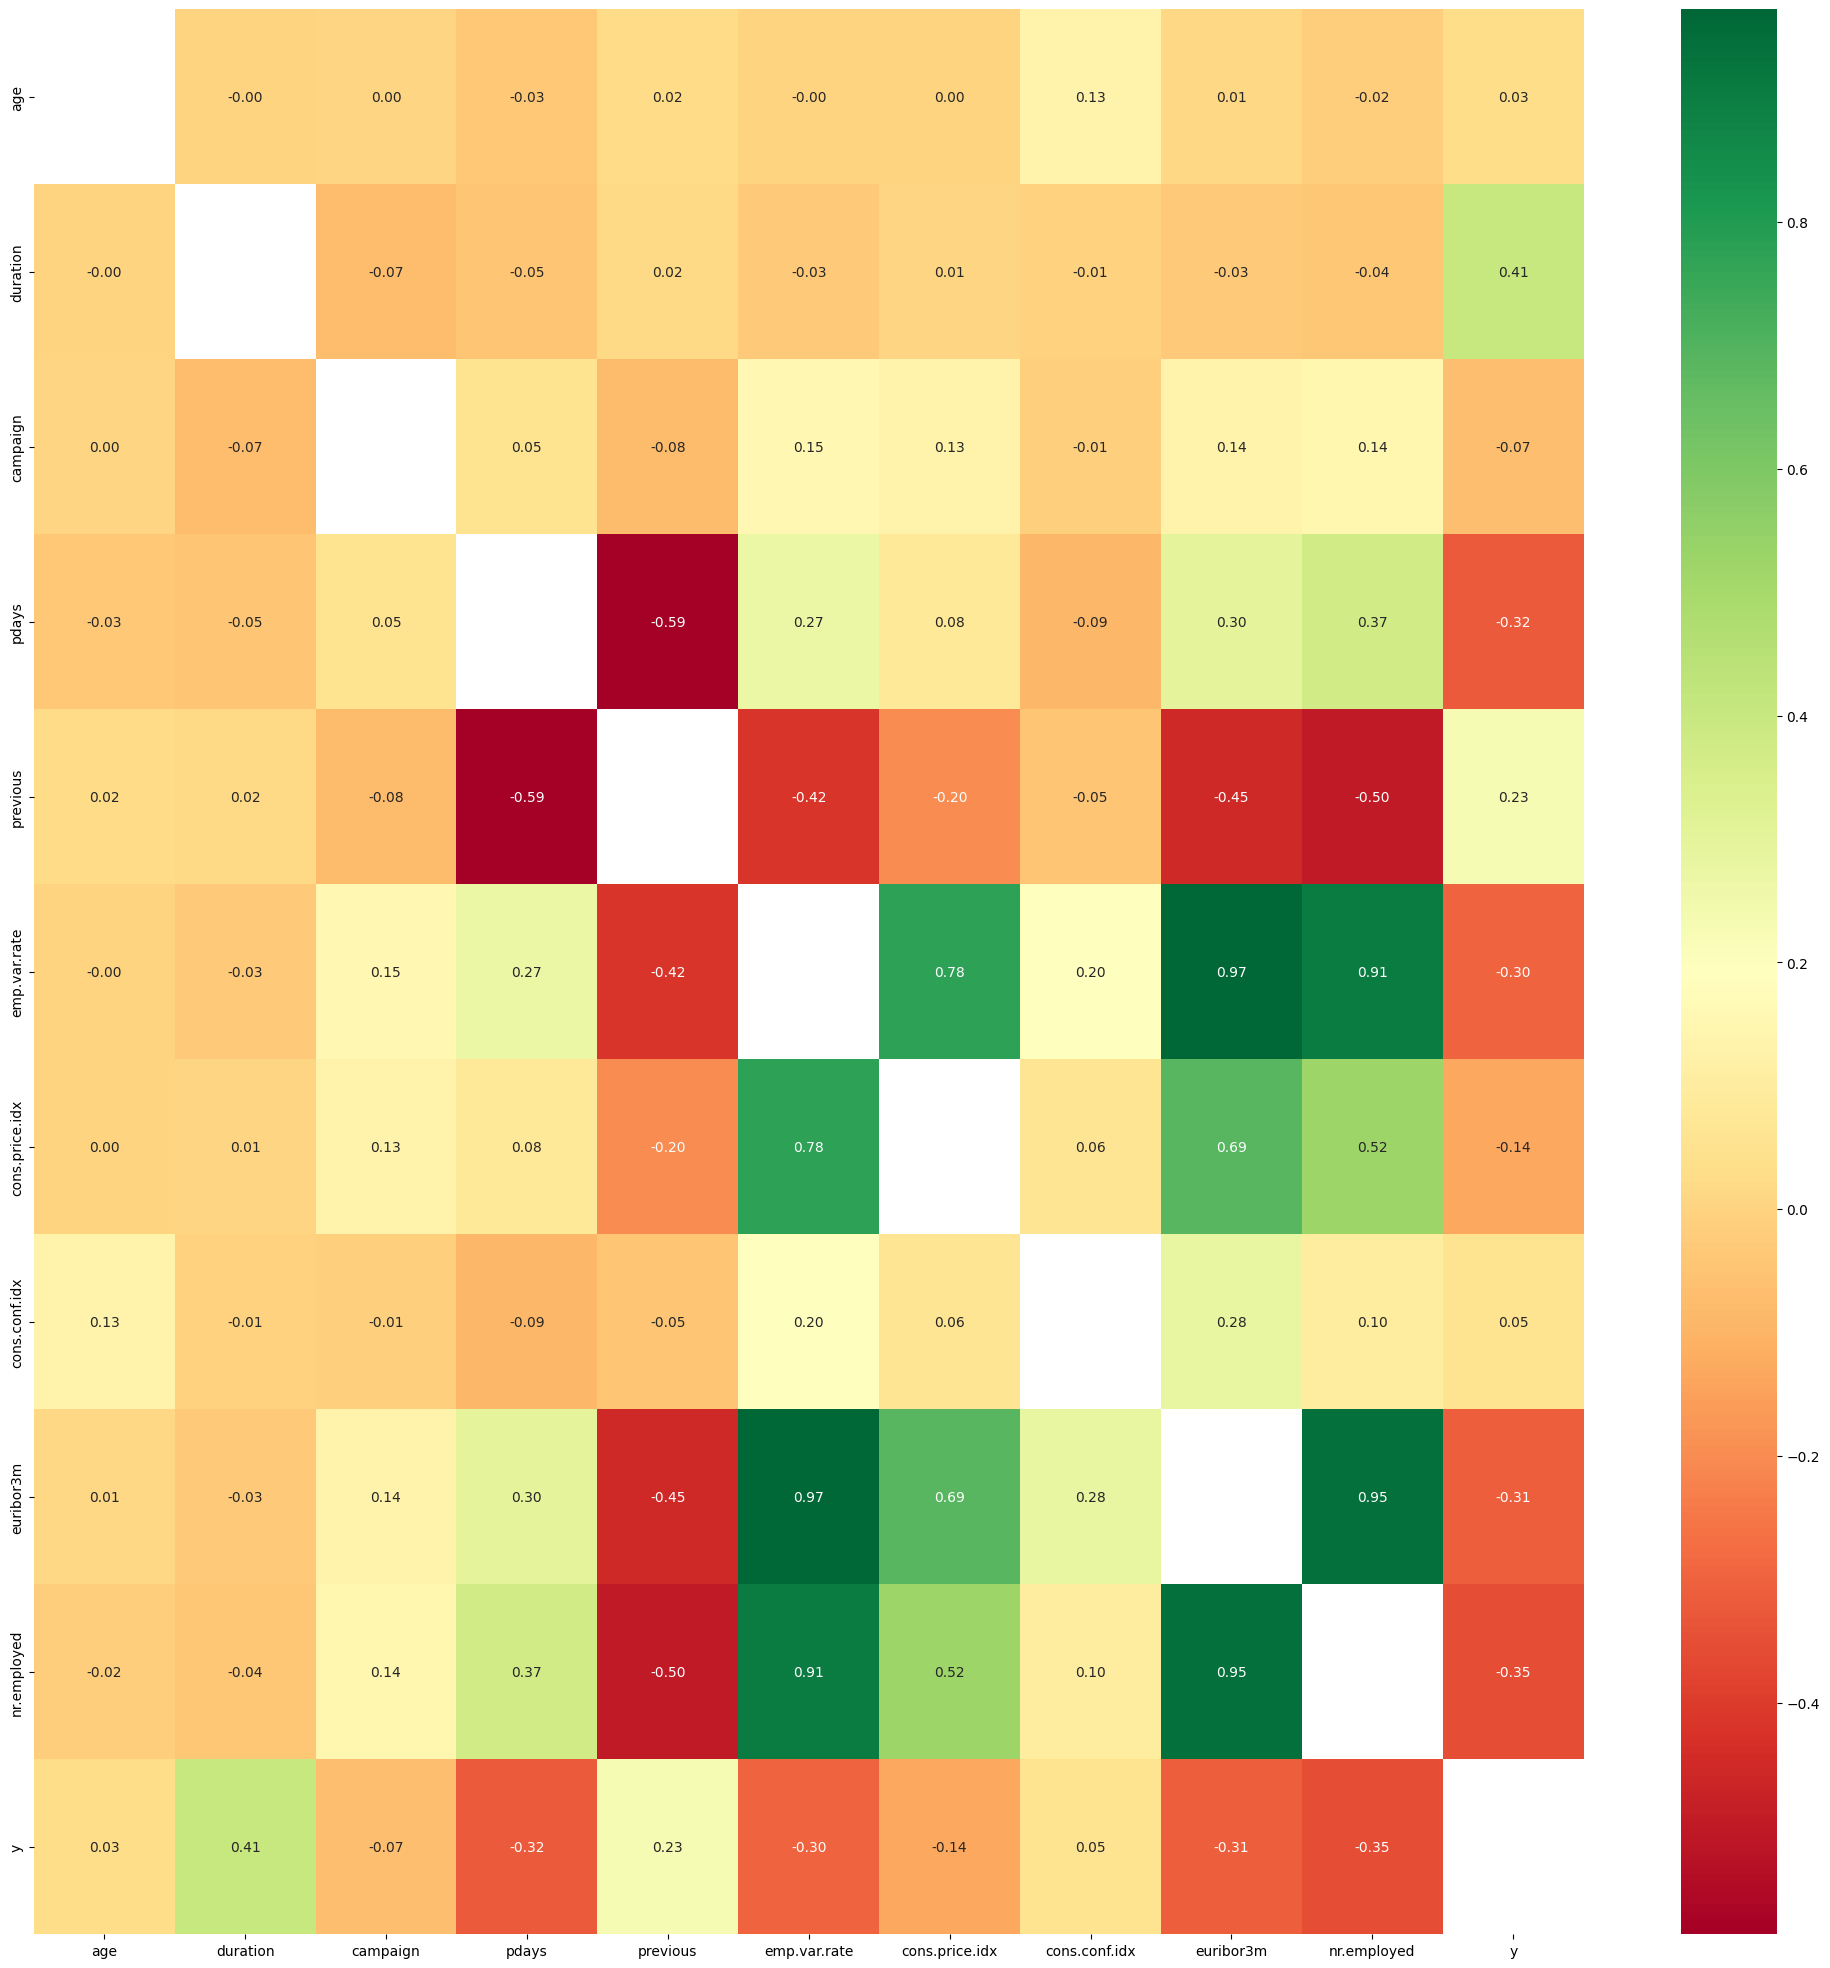

In [ ]:
corr_df = df.select_dtypes(include=["int64","float64"]).corr()
corr_df['pdays'] = corr_df['pdays'].replace(999, 0)

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df[corr_df < 0.9999], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

- emp.var.rate (темп зміни зайнятості) корелює з nr.employed (кількість працевлаштованих осіб)
- euribor3m (ставка Euribor на 3 місяці) корелює з emp.var.rate (темп зміни зайнятості)
- euribor3m корелює з nr.employed
- cons.price.idx (індекс споживчих цін) корелює з emp.var.rate (темп зміни зайнятості)
- cons.price.idx корелює з euribor3m і nr.employed

Усі соціально-економічні атрібути сильно позитивно корелюють між собою.

- previous (кількість контактів до цієї кампанії) негативно з nr.employed та euribor3m, emp.var.rate, cons.price.idx

- pdays (кількість днів з моменту останнього контакту в попередній кампанії) дуже негативно з previous

Окрім previous та duration всі негативно корелюють з цільовою

- duration (0.41) корелює з цільовою
- pdays (-0.32) негативно корелює з y

### Гіпотези щодо впливу окремих ознак на цільову ознаку y

- Результат попередньої маркетингової кампанії (poutcome) важлива ознака: якщо результат попередньої кампанії був успішним, то ймовірність того, що кліент візьме депозит у цій кампанії вища.
- Також важливо як (contact=cellular) та коли (month, day_of_week) контактували з кліентом.
- Чим менша кількість працевлаштованих людей у країні (nr.employed, emp.var.rate), тим більше ймовірность, що кліент візьме строковий депозит.
- Незважаючи на високі показники успіху, з клиентами з якими раніше не контактували, - шанс більше, що кліент візьме депозит, саме коли з ним вже контактували раніше (pdays, previous).

# 2. План

Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

Так як потрібно прогнозувати належність кліента до категорії - чи підпише він строковий депозит чи ні (так/ні, 1/0) на основі вхідних даних, треба використовувати бінарну класифікацію, таку як: логістична регресія, K-найближчих сусідів, дерева рішень.

Виходячи з того, що класовий дисбаланс досить великий у користь 0: no	88.73%,
yes	11.27%, можливо треба буде використовувати oversampling/undersampling.

А для оцінки якості краще обрати AUROC. Вона краще підходить, коли потрібно порівнювати моделі, побачити як вона визначає 0 та 1, і, якщо треба можно змінювати правило, за яким модель приймає рішення (поріг), щоб чи уникати помилок, чи навпаки зробити модель більш чутливою, щоб знайти всі випадки.


# 3. Preprocessing

## Outliers

Виявлення outliers і видалення тих, які вище квртиля 95.

In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,40878.00,40878.00,40878.00,40878.00,40878.00,40878.00,40878.00,40878.00,40878.00,40878.00,40878.00
mean,40.02,257.93,2.57,968.15,0.15,0.10,93.57,-40.51,3.64,5168.35,0.11
std,10.37,259.62,2.78,172.28,0.40,1.57,0.58,4.61,1.72,70.87,0.31
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00
50%,38.00,179.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,4918.00,56.00,999.00,2.00,1.40,94.77,-26.90,5.04,5228.10,1.00


Визначення викидів після 95 квантиля

In [39]:
# Розділення даних на дві групи
df1 = df[df['y'] == 1]
df0 = df[df['y'] == 0]

def outlier_analysis(df0, df1, col_name):

  print(f"{col_name} - підписав депозит")
  Q1 = df1[col_name].quantile(0.25)
  Q3 = df1[col_name].quantile(0.95)
  IQR = Q3 - Q1
  print(IQR)

  Min_value1 = (Q1 - 1.5 * IQR)
  Max_value1 = (Q3 + 1.5 * IQR)
  print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
  print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

  print(f"\n{col_name} - не підписав депозит")
  Q1 = df0[col_name].quantile(0.25)
  Q3 = df0[col_name].quantile(0.95)
  IQR = Q3 - Q1
  print(IQR)

  Min_value2 = (Q1 - 1.5 * IQR)
  Max_value2 = (Q3 + 1.5 * IQR)
  print("Мінімальне значення, до якого існують викиди: {}".format(Min_value2))
  print("Максимальне значення, після якого існують викиди: {}".format(Max_value2))

  return Max_value1, Max_value2

def kde_no_outliers(df0, df1, Max_value1, Max_value2, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Підписав депозит')
  sns.kdeplot(df0[df0[column] <= Max_value2][column],label = 'Не підписав депозит')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

def one_d_num_analysis2(df0, df1, col_name):
  Max_value1, Max_value2 = outlier_analysis(df0, df1, col_name)
  print("\nВидалення викидів і побудова діаграми розподілу")
  kde_no_outliers(df0, df1, Max_value1, Max_value2, col_name)

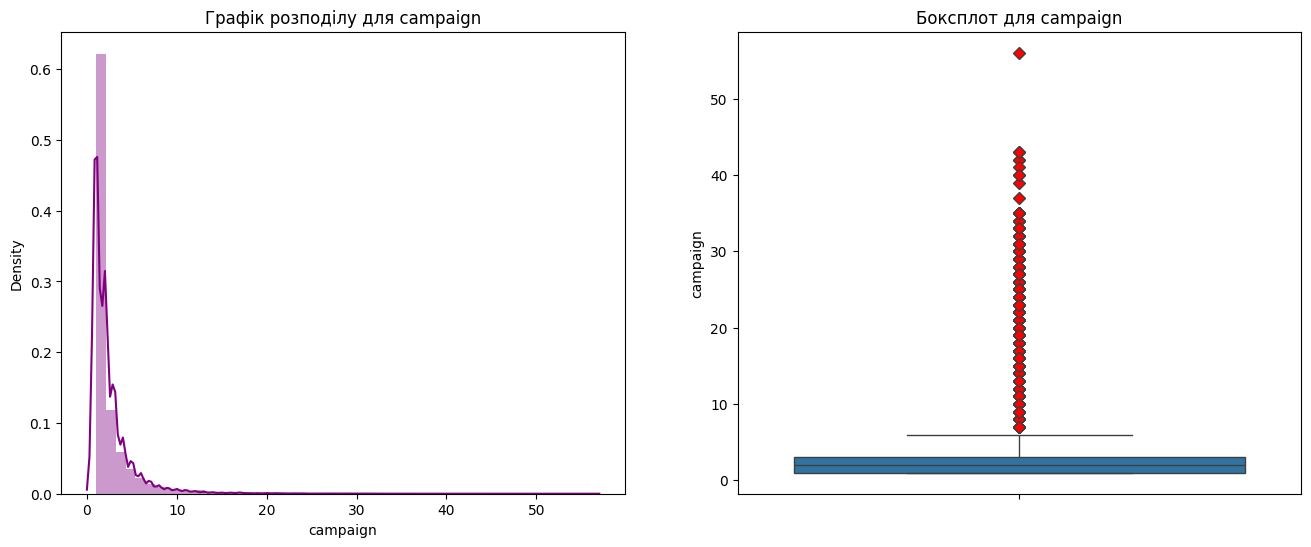

np.float64(6.0)

In [48]:
dist_box(df, 'campaign')
outlier_range(df, 'campaign')

campaign - підписав депозит
4.0
Мінімальне значення, до якого існують викиди: -5.0
Максимальне значення, після якого існують викиди: 11.0

campaign - не підписав депозит
6.0
Мінімальне значення, до якого існують викиди: -8.0
Максимальне значення, після якого існують викиди: 16.0

Видалення викидів і побудова діаграми розподілу


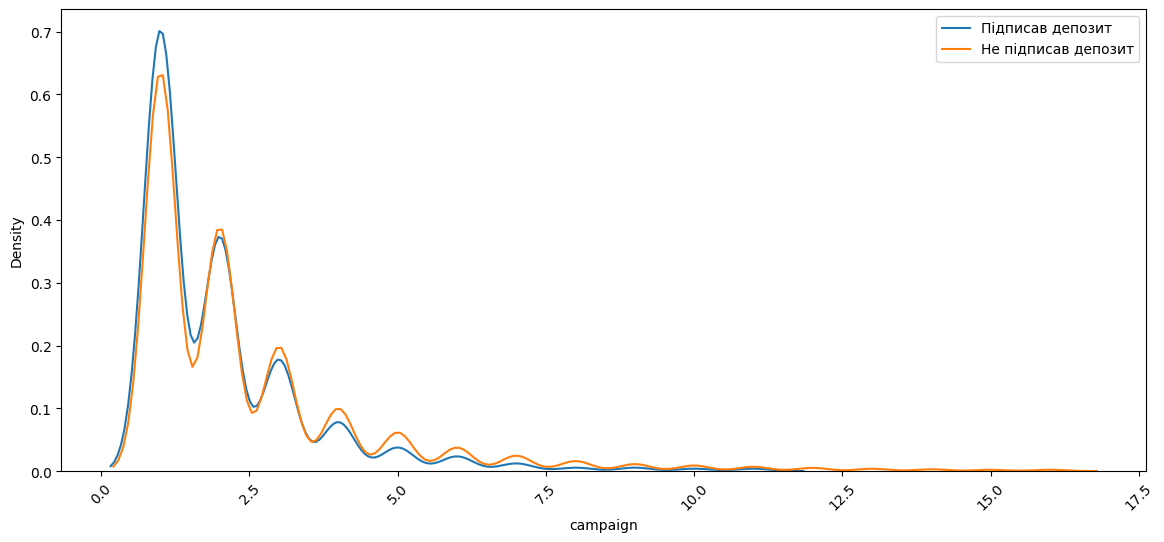

In [49]:
one_d_num_analysis2(df0, df1, 'campaign')

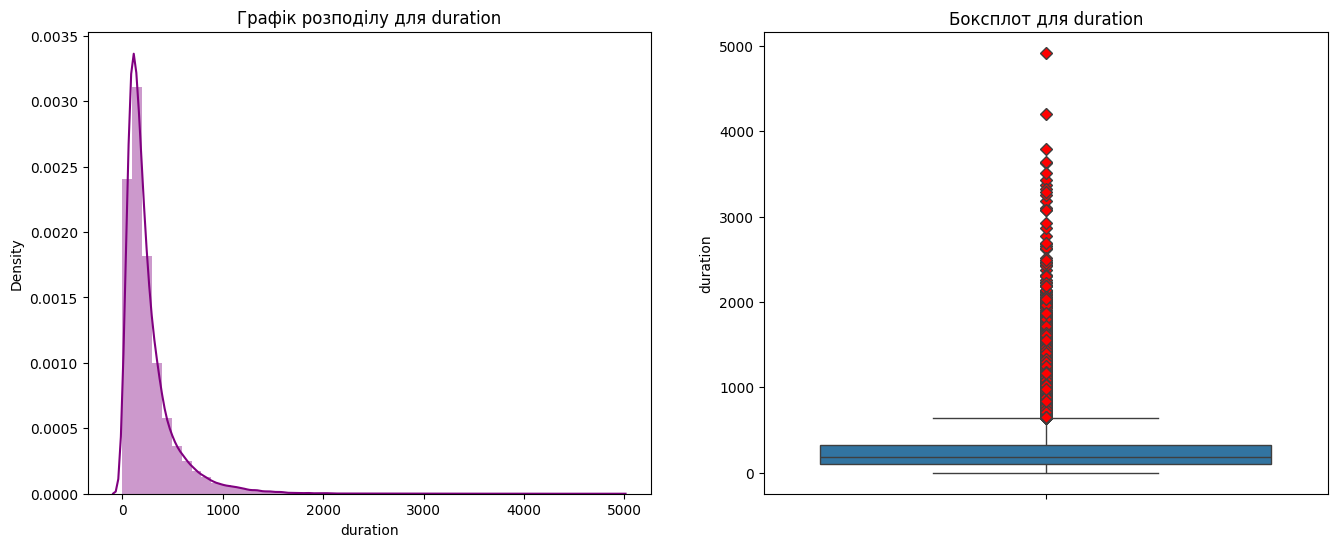

np.float64(644.5)

In [ ]:
dist_box(df, 'duration')
outlier_range(df, 'duration')

duration - підписав депозит
1058.0
Мінімальне значення, до якого існують викиди: -1334.0
Максимальне значення, після якого існують викиди: 2898.0

duration - не підписав депозит
500.0
Мінімальне значення, до якого існують викиди: -655.0
Максимальне значення, після якого існують викиди: 1345.0

Видалення викидів і побудова діаграми розподілу


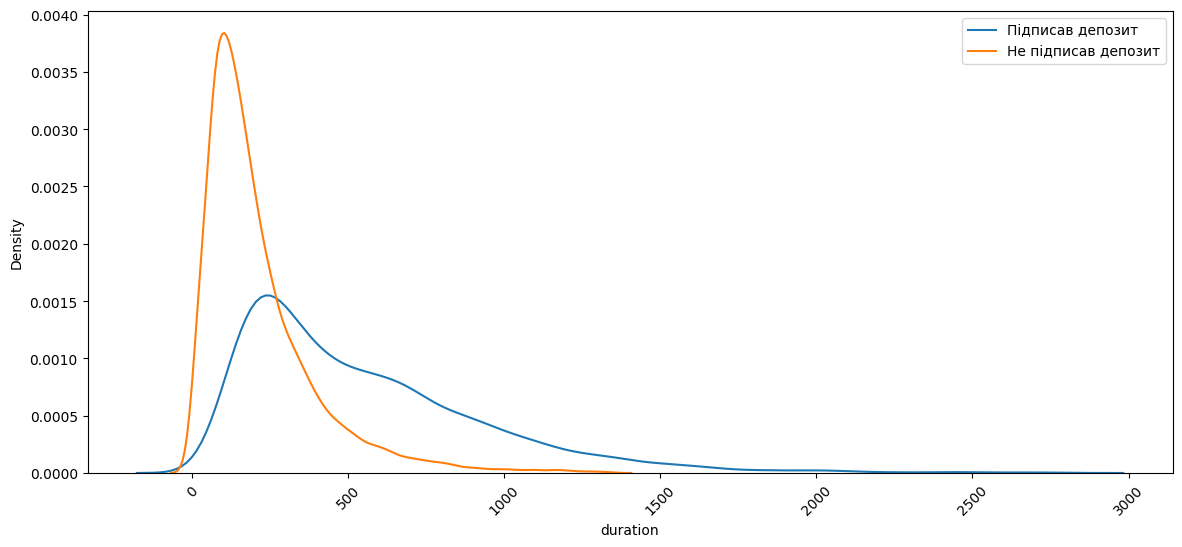

In [ ]:
one_d_num_analysis2(df0, df1, 'duration')

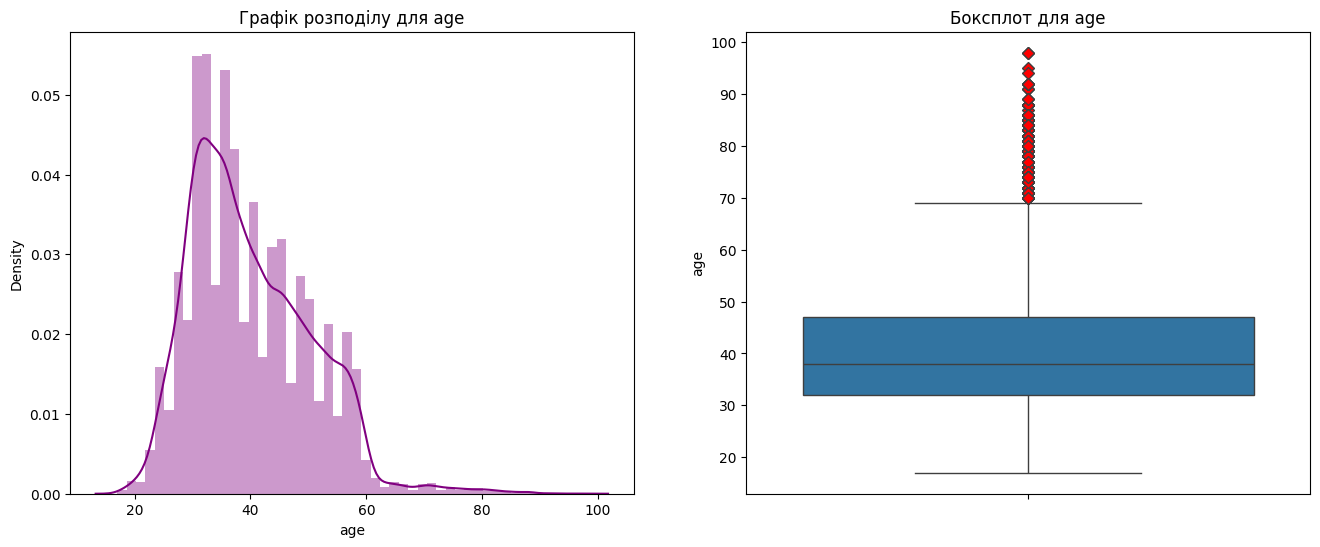

np.float64(69.5)

In [ ]:
dist_box(df, 'age')
outlier_range(df, 'age')

age - підписав депозит
38.0
Мінімальне значення, до якого існують викиди: -26.0
Максимальне значення, після якого існують викиди: 126.0

age - не підписав депозит
25.0
Мінімальне значення, до якого існують викиди: -5.5
Максимальне значення, після якого існують викиди: 94.5

Видалення викидів і побудова діаграми розподілу


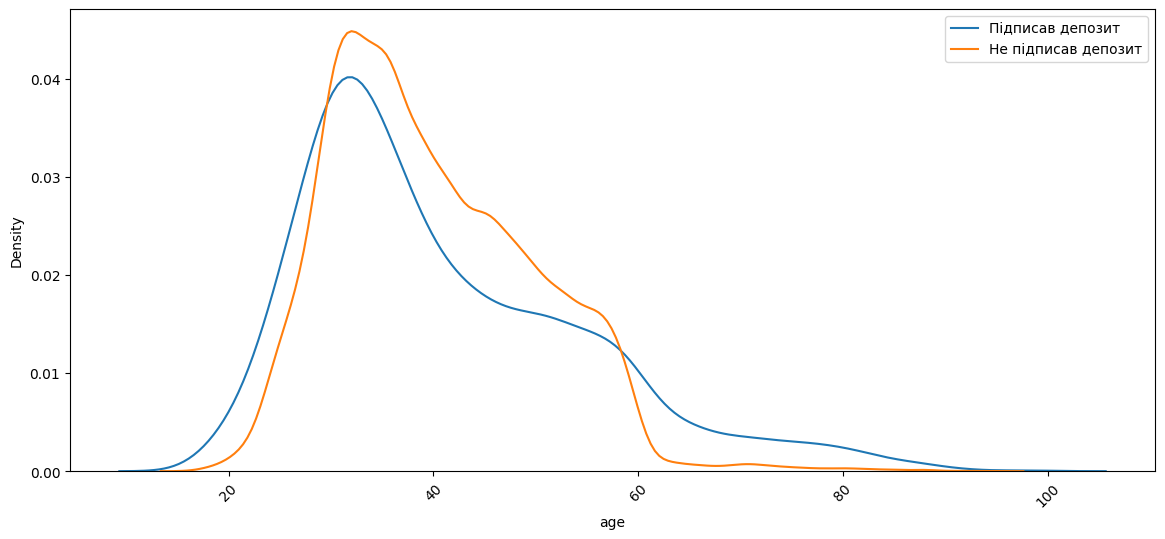

In [ ]:
one_d_num_analysis2(df0, df1, 'age')

### pdays 999 треба перетворити на 0

Для легшої інтерпретації

In [104]:
df['pdays'] = df['pdays'].replace(999, 0)

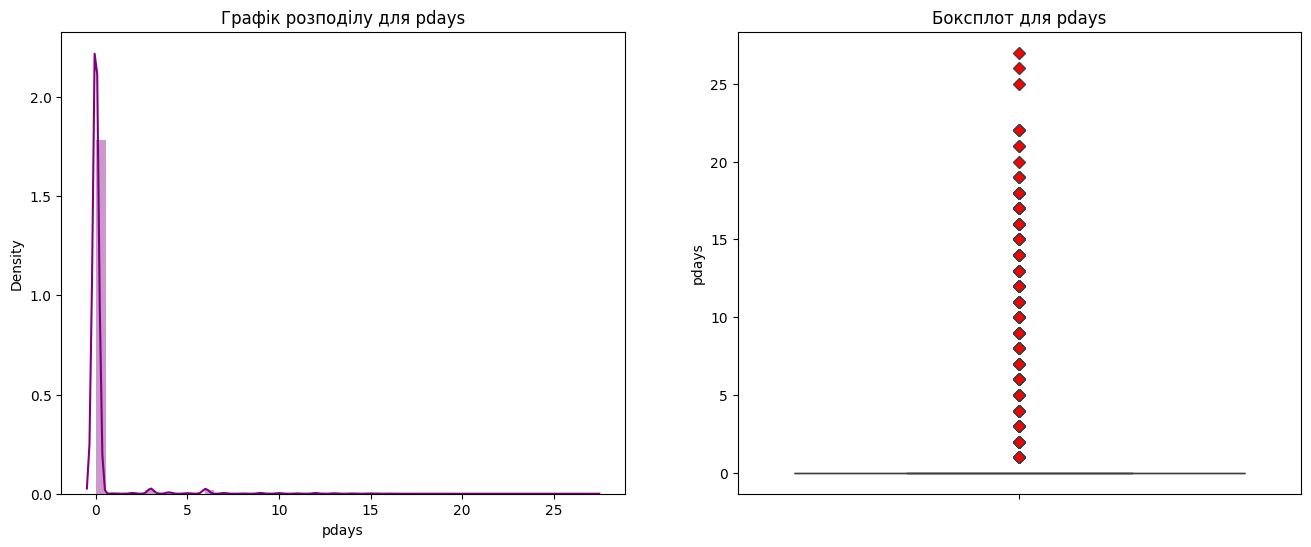

np.float64(0.0)

In [ ]:
dist_box(df, 'pdays')
outlier_range(df, 'pdays')

pdays - підписав депозит
7.0
Мінімальне значення, до якого існують викиди: -10.5
Максимальне значення, після якого існують викиди: 17.5

pdays - не підписав депозит
0.0
Мінімальне значення, до якого існують викиди: 0.0
Максимальне значення, після якого існують викиди: 0.0

Видалення викидів і побудова діаграми розподілу


<ipython-input-66-d3fa3d5cc31d>:34: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df0[df0[column] <= Max_value2][column],label = 'Не підписав депозит')


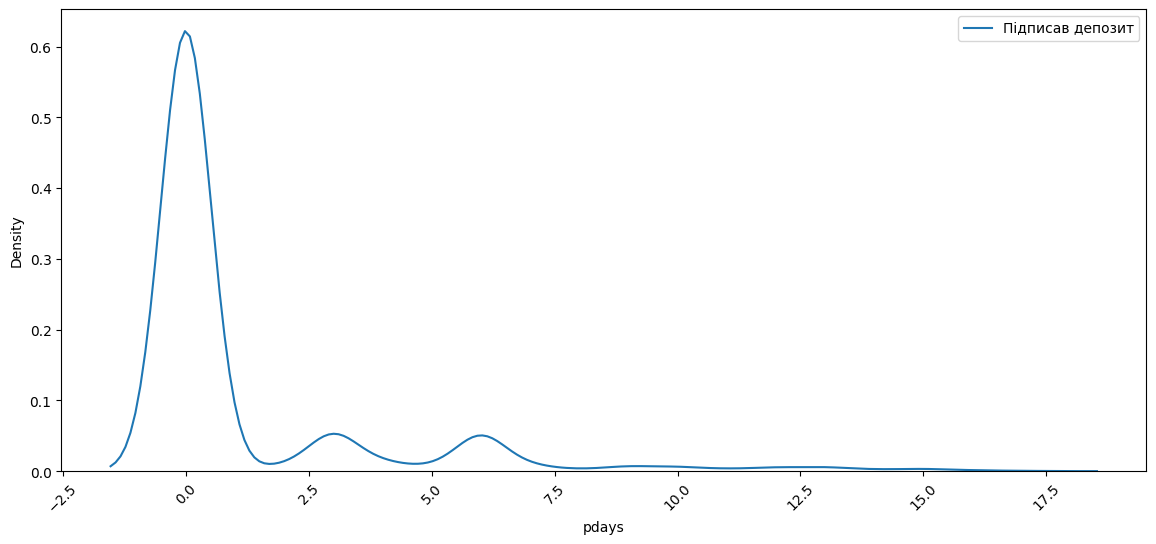

In [ ]:
one_d_num_analysis2(df0, df1, 'pdays')

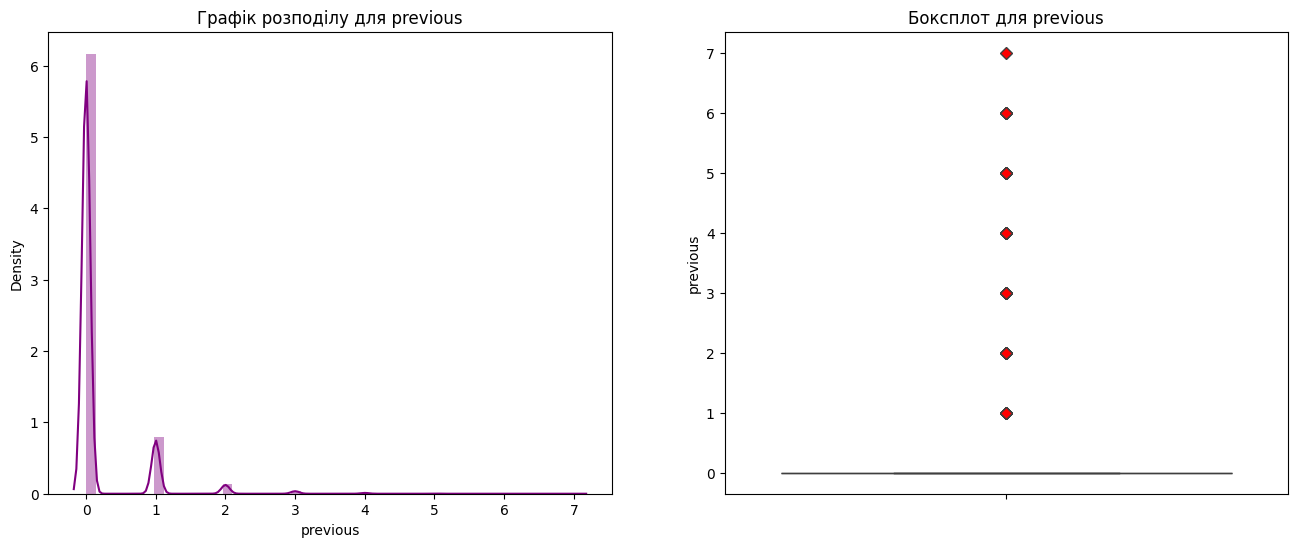

np.float64(0.0)

In [ ]:
dist_box(df, 'previous')
outlier_range(df, 'previous')

previous - підписав депозит
2.0
Мінімальне значення, до якого існують викиди: -3.0
Максимальне значення, після якого існують викиди: 5.0

previous - не підписав депозит
1.0
Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5

Видалення викидів і побудова діаграми розподілу


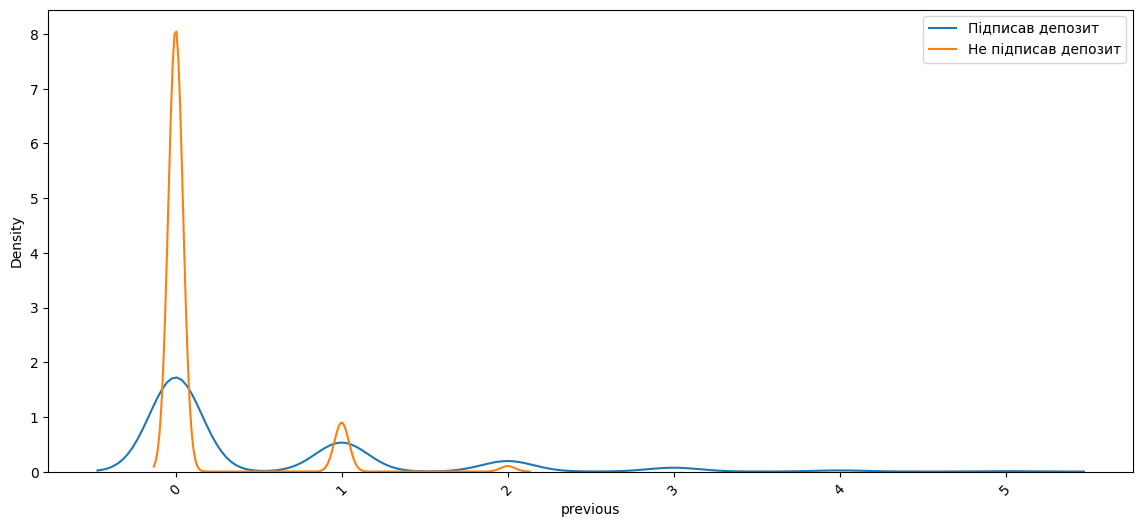

In [ ]:
one_d_num_analysis2(df0, df1, 'previous')

### Outliers analysis

- **age**: outliers after 69
- **campaign** (number of contacts within the current campaign): має залишки від 15 значення
- **duration**: має викиди після 2000 значення
- **pdays**: має трохи залишків після 15 значення
- **previous**: має кілька залишкових значень після 3

Виделеня викидів для duration, campaign, pdays, previous може покращіти модель, бо дуже малі значення не впливають на цільову зміну. Можна видалити, щоб побачити покращення

In [105]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Initialize
df_filtered = df.copy()

# Remove outliers from specified columns
for column in ['campaign', 'duration', 'pdays', 'previous']:
    df_filtered = remove_outliers_iqr(df_filtered, column)

df = df_filtered  # Присвоєння результату назад до df

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00,39207.00
mean,39.95,251.37,2.44,0.00,0.11,0.16,93.58,-40.58,3.72,5172.18,0.09
std,10.17,235.39,2.13,0.00,0.34,1.53,0.57,4.52,1.68,67.33,0.29
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00
25%,32.00,101.00,1.00,0.00,0.00,-1.80,93.08,-42.70,1.41,5099.10,0.00
50%,38.00,177.00,2.00,0.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00
75%,47.00,315.00,3.00,0.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00
max,98.00,1730.00,16.00,0.00,2.00,1.40,94.77,-26.90,5.04,5228.10,1.00


## Feature engineering

In [106]:
# Define a mapping between education categories and numerical values
education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7
}

# Convert the 'education' column to numerical representation
df['education_numeric'] = df['education'].map(education_mapping)

# Define bins using numerical values
bins = [0, 3, 4, 6, 8]

# Use pd.cut with numerical bins and labels
df['education_bins'] = pd.cut(df['education_numeric'], bins=bins,
                               labels=['primary', 'secondary', 'higher',
                                       'unknown'], include_lowest=True,
                                      duplicates='drop', ordered=False)
# drop the temporary columns
df = df.drop(['education_numeric', 'education'], axis=1)

In [107]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'senior'])
df = df.drop(['age'], axis=1)

In [108]:
df['total_contacts'] = df['campaign'] + df['previous']

## Splitting

In [109]:
# Create training, validation and test sets
train_val_df, test_df = train_test_split(df, test_size=0.2, stratify=df['y'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['y'], random_state=42)

# Create inputs and targets
input_cols = list([col for col in df.columns if col != 'y'])
target_col = 'y'
train, train_targets = train_df[input_cols], train_df[target_col]
val, val_targets = val_df[input_cols], val_df[target_col]
test, test_targets = test_df[input_cols], test_df[target_col]


# Identify numeric and categorical columns
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

## Categorical features

- обробку категоріальних змінних (якщо цього потребує модель)
- групування категорій в категоріальних змінних, якщо потрібно

В наборі даних 10 числових і 11 категоріальних колонок з них:
- 1 бінарна: contact (cellular, telephone)
- 3 мультикатегоріальних, які мають yes, no, unknown значення: default, housing, loan
- 5 мультикатегоріальних (більше 3х значень) зі значеннями, для яких немає відношення порядку: job, marital, education, month, day_of_week
- 1 колонка ordinal: poutcome

In [203]:
train[categorical_cols].nunique()

,0
job,12
marital,4
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3
education_bins,4


Kодування колонок з бінарними значеннями

In [ ]:
df['contact'].value_counts()

,count
contact,
cellular,26144
telephone,15044


In [110]:
contact_flag = {'telephone': 0, 'cellular': 1}
train['contact_flag'] = train.contact.map(contact_flag)
val['contact_flag'] = val.contact.map(contact_flag)
test['contact_flag'] = test.contact.map(contact_flag)

OrdinalEncoder

In [111]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['failure', 'nonexistent', 'success']]) # визначаємо порядок категорій
ordenc.fit(train[['poutcome']])

train['poutcome_codes'] = ordenc.transform(train[['poutcome']])
val['poutcome_codes'] = ordenc.transform(val[['poutcome']])
test['poutcome_codes'] = ordenc.transform(test[['poutcome']])

OneHotEncoder

In [112]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_cols = [col for col in categorical_cols if col not in ['contact', 'poutcome']]

encoder.fit(train[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols)) # Generate column names for each individual category

print(encoded_cols)

train[encoded_cols] = encoder.transform(train[cat_cols])
val[encoded_cols] = encoder.transform(val[cat_cols])
test[encoded_cols] = encoder.transform(test[cat_cols])

['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'education_bins_higher', 'education_bins_primary', 'education_bins_secondary', 'education_bins_unknown', 'age_bin_middle-aged', 'age_bin_senior', 'age_bin_young']


## Numerical features

In [113]:
scaler = StandardScaler()
scaler.fit(train[numeric_cols])

train[numeric_cols] = scaler.transform(train[numeric_cols])
val[numeric_cols] = scaler.transform(val[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

Комбінування соціально-економічних атрибутів

In [114]:
def create_economic_health_index(df, weights):

  df['economic_health_index'] = sum(
      [df[feature] * weight for feature, weight in weights.items() if feature in df.columns]
  )
  return df

# Define weights once
weights = {
    'emp.var.rate': 0.5,
    'cons.conf.idx': 0.05,
    'cons.price.idx': 0.1,
    'nr.employed': 0.6,
    'euribor3m': 0.05,
}

# Apply the function to all datasets using a loop
for df in [train, val, test]:
    df = create_economic_health_index(df, weights)
    df.drop(columns=list(weights), axis=1, errors='ignore', inplace=True)

# Update numeric_cols
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()

In [115]:
train = train[numeric_cols + encoded_cols]
val = val[numeric_cols + encoded_cols]
test = test[numeric_cols + encoded_cols]

In [265]:
# Displaying the transformed datasets
pd.set_option('display.max_columns', None)
display(train.head()), display(val.head())

,age,duration,campaign,pdays,previous,total_contacts,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young,economic_health_index,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young
4113,-0.88,-0.70,1.64,0.00,-0.33,1.59,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.41,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
6495,1.87,1.35,-0.68,0.00,-0.33,-0.73,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.41,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
21905,1.28,-0.61,-0.68,0.00,-0.33,-0.73,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.65,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
29025,1.48,1.13,-0.68,0.00,2.60,-0.26,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,-1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
16439,-1.86,0.12,-0.68,0.00,-0.33,-0.73,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.62,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


,age,duration,campaign,pdays,previous,total_contacts,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young,economic_health_index,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,education_bins_higher,education_bins_primary,education_bins_secondary,education_bins_unknown,age_bin_middle-aged,age_bin_senior,age_bin_young
37748,-1.57,-0.84,-0.68,0.00,-0.33,-0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,-1.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
13239,1.18,0.58,1.18,0.00,-0.33,1.12,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.62,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
21558,0.89,-0.76,0.25,0.00,-0.33,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
6561,-1.18,-0.56,-0.68,0.00,-0.33,-0.73,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
15072,-1.27,-0.70,-0.68,0.00,-0.33,-0.73,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.62,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


(None, None)

In [266]:
train['economic_health_index'].nunique()

358

# 4. Model training

## Logistic Regression

In [121]:
model = LogisticRegression(solver='liblinear')

model.fit(train, train_targets)

train_preds = model.predict(train)

roc_auc = roc_auc_score(train_targets, model.predict_proba(train)[:, 1])
print(f"ROC AUC training: {roc_auc:.4f}")
roc_auc_val = roc_auc_score(val_targets, model.predict_proba(val)[:, 1])
print(f"ROC AUC validation: {roc_auc_val:.4f}")

ROC AUC training: 0.9303
ROC AUC validation: 0.9321


In [122]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## kNN

In [123]:
knn = KNeighborsClassifier()
# Training the model on the training data
knn.fit(train, train_targets)

# Predicting probabilities for training and validation data
train_probs = knn.predict_proba(train)[:, 1]
val_probs = knn.predict_proba(val)[:, 1]

# Calculating AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_probs)
val_auroc = roc_auc_score(val_targets, val_probs)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

AUROC on training data: 0.961731078825808
AUROC on validation data: 0.8161892867903943


In [124]:
# Define the parameter grid
params_knn = {'n_neighbors': np.arange(1, 25)}
# Initialize the kNN classifier
knn = KNeighborsClassifier()
# Initialize GridSearchCV
knn_gs = GridSearchCV(knn, params_knn, cv=5)
# Fit the model
knn_gs.fit(train, train_targets)

# Get the best estimator
knn_best = knn_gs.best_estimator_

print(f"Best parameters: {knn_gs.best_params_}")
print(f"Best score: {knn_gs.best_score_}")

# Predict probabilities using the best model
train_probs = knn_best.predict_proba(train)[:, 1]  # Use knn_best for prediction
val_probs = knn_best.predict_proba(val)[:, 1]

# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_probs)
val_auroc = roc_auc_score(val_targets, val_probs)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

Best parameters: {'n_neighbors': np.int64(17)}
Best score: 0.9131062355866895
AUROC on training data: 0.9410247304340276
AUROC on validation data: 0.8863990802145829


## Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(train, train_targets)

DecisionTreeClassifier(random_state=42)

In [137]:
# Функція для обчислення AUROC
def compute_auroc(inputs, targets, name=''):
    # Передбачаємо ймовірності класу 1
    y_pred_proba = model.predict_proba(inputs)[:, 1]

    # Обчислюємо AUROC
    roc_auc = roc_auc_score(targets, y_pred_proba)
    print(f'AUROC for {name}: {roc_auc:.3f}')

In [138]:
compute_auroc(train, train_targets, 'Training')
compute_auroc(val, val_targets, 'Validation')

AUROC for Training: 1.000
AUROC for Validation: 0.708


In [130]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(5)

,feature,importance
0,duration,0.38
54,economic_health_index,0.21
4,total_contacts,0.03
1,campaign,0.02
5,contact_flag,0.01


In [131]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train, train_targets)
    roc_auc = roc_auc_score(train_targets, model.predict_proba(train)[:, 1])
    roc_auc_val = roc_auc_score(val_targets, model.predict_proba(val)[:, 1])
    train_error = roc_auc
    val_error = roc_auc_val
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 11)])

In [132]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.708170,0.721375
1,2,0.849353,0.851624
2,3,0.891098,0.891864
3,4,0.901303,0.899984
4,5,0.925856,0.922555
5,6,0.935984,0.926451
6,7,0.945815,0.909972
7,8,0.954592,0.899434
8,9,0.963213,0.872208
9,10,0.971043,0.853753


In [146]:
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(train, train_targets)

compute_auroc(train, train_targets, 'Training')
compute_auroc(val, val_targets, 'Validation')

AUROC for Training: 0.936
AUROC for Validation: 0.926


## Boosting algorithm

In [140]:
! pip freeze | grep xgboost

xgboost==3.0.0


In [151]:
xgb_clf = XGBClassifier(
    max_depth=5,
    n_estimators=20,
    enable_categorical=True,  # для категорійних ознак
    use_label_encoder=False,  # щоб уникнути попереджень, якщо використовуєте нові версії XGBoost
    missing=np.nan,  # явне вказування пропущених значень
    device='cuda'
)

xgb_clf.fit(train.to_numpy(), train_targets)

train_pred = xgb_clf.predict_proba(train.to_numpy())[:, 1]
val_pred = xgb_clf.predict_proba(val.to_numpy())[:, 1]

# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:26:52] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:26:52] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:26:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC on training data: 0.9562397448257687
AUROC on validation data: 0.9448366370024313


# 5. Model comparison table

In [152]:
import pandas as pd

# Define the data for the table
data = {
    'Назва моделі': ['Logistic Regression', 'kNN', 'Decision Tree', 'XGBoost'],
    'Гіперпараметри': [
        'solver="liblinear"',
        'n_neighbors=17, ',
        'max_depth=6',
        'max_depth=5, n_estimators=20'
    ],
    'Метрика якості (тренувальний набір)': [
        '0.930',
        '0.941',
        '0.936',
        '0.956'
    ],
    'Метрика якості (валідаційний набір)': [
        '0.932',
        '0.886',
        '0.926',
        '0.944'
    ],
    'Коментар': [
        'Хороша модель, добре генералізує. Методи балансування та регуляризації не дали результат.',
        'Така собі модель, має нижчу точність (перенавчання) на валідаційному наборі навіть з використанням GridSearchCV. Можно спробувати ще використати методи регуляризації.',
        'Непогана модель, має невелике перенавчання. GridSearchCV не покращів результат. Треба ще перебирати гіперпараметри.',
        'Найкраща модель, трохи перенавчаєтся, але треба ще спробувати налаштувати гіперпараметри для подальшого покращення.'
    ]
}

# Create the DataFrame
df_models = pd.DataFrame(data)

# Display the table
df_models.style

,Назва моделі,Гіперпараметри,Метрика якості (тренувальний набір),Метрика якості (валідаційний набір),Коментар
0,Logistic Regression,"solver=""liblinear""",0.930,0.932,"Хороша модель, добре генералізує. Методи балансування та регуляризації не дали результат."
1,kNN,"n_neighbors=17,",0.941,0.886,"Така собі модель, має нижчу точність (перенавчання) на валідаційному наборі навіть з використанням GridSearchCV. Можно спробувати ще використати методи регуляризації."
2,Decision Tree,max_depth=6,0.936,0.926,"Непогана модель, має невелике перенавчання. GridSearchCV не покращів результат. Треба ще перебирати гіперпараметри."
3,XGBoost,"max_depth=5, n_estimators=20",0.956,0.944,"Найкраща модель, трохи перенавчаєтся, але треба ще спробувати налаштувати гіперпараметри для подальшого покращення."


# 6. Hyperparameters tuning  

## Sklearn: Randomized Search

In [166]:
import xgboost as xgb

# Визначте простір пошуку гіперпараметрів
param_dist = {
    'max_depth': [1, 2, 3, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
}

# Ініціалізуйте модель
xgb_clf = xgb.XGBClassifier(
    enable_categorical=True,
    use_label_encoder=False,
    tree_method='hist',  # Use 'hist' tree method for better performance
    missing=np.nan,
)

# Ініціалізуйте RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  # Кількість ітерацій пошуку
    scoring='roc_auc',  # Метрика для оцінки
    cv=5,  # Кількість фолдів крос-валідації
    verbose=3,  # Рівень деталізації виводу
    random_state=42,  # Фікс. для відтворюваності
    n_jobs=-1, # Використати всі ядра процесора
)

# Навчіть модель з пошуком гіперпараметрів
random_xgb_clf = random_search.fit(train.to_numpy(), train_targets)

# Виведіть найкращі гіперпараметри
print("Найкращі гіперпараметри:", random_search.best_params_)

# Оцініть модель на тренувальному та валідаційному наборах
train_pred = random_search.predict_proba(train.to_numpy())[:, 1]
val_pred = random_search.predict_proba(val.to_numpy())[:, 1]

train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC на тренувальному наборі: {train_auroc}")
print(f"AUROC на валідаційному наборі: {val_auroc}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:36:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Найкращі гіперпараметри: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.7}
AUROC на тренувальному наборі: 0.964018286221504
AUROC на валідаційному наборі: 0.9463813638666358


## Hyperopt: Bayesian Optimization

In [154]:
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score

In [171]:
def objective(params):
    clf = xgb.XGBClassifier(
    n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=params['min_child_weight'],  # Мінімальна сума ваг всіх вибірок, необхідна в кінцевому вузлі
        subsample=params['subsample'],  # Частка вибірок, що використовуються для побудови кожного дерева
        colsample_bytree=params['colsample_bytree'],  # Частка ознак, що використовуються при побудові кожного дерева
        gamma=params['gamma'],  # Мінімальне зменшення втрат, необхідне для виконання поділу
        reg_alpha=params['reg_alpha'],  # Параметр регуляризації L1 (Lasso)
        reg_lambda=params['reg_lambda'],  # Параметр регуляризації L2 (Ridge)
        enable_categorical=True,
        use_label_encoder=False,
        missing=np.nan,
        device='cuda',
        early_stopping_rounds=10
    )

    clf.fit(
        train.to_numpy(),
        train_targets,
        eval_set=[(val.to_numpy(), val_targets)],
        verbose=False)
    pred = clf.predict(val.to_numpy())
    auroc = roc_auc_score(val_targets, pred)

    return {'loss': -auroc, 'status': STATUS_OK}

# Простір гіперпараметрів
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 800, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 25, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0, 2.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 3),
    'reg_lambda': hp.uniform('reg_lambda', 0, 3)
}

# Оптимізація
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Перетворення значень гіперпараметрів у кінцеві типи
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Найкращі гіперпараметри: ", best)

# Навчання фінальної моделі з найкращими гіперпараметрами
final_clf = xgb.XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    enable_categorical=True,
    use_label_encoder=False,
    missing=np.nan,
    device='cuda',
)

final_clf.fit(train.to_numpy(), train_targets)

# Predict on the training set for calculating train_auroc
train_pred = final_clf.predict_proba(train.to_numpy())[:, 1]
final_pred = final_clf.predict_proba(val.to_numpy())[:, 1]
# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, final_pred)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:31] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:31] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  2%|▏         | 1/50 [00:00<00:30,  1.58trial/s, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:31] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:31] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  4%|▍         | 2/50 [00:01<00:34,  1.39trial/s, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:32] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:32] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  6%|▌         | 3/50 [00:02<00:31,  1.49trial/s, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:33] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:33] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



  8%|▊         | 4/50 [00:02<00:35,  1.30trial/s, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:34] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:34] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 10%|█         | 5/50 [00:06<01:27,  1.95s/trial, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:38] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:38] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 12%|█▏        | 6/50 [00:07<01:09,  1.58s/trial, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:38] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:38] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 14%|█▍        | 7/50 [00:08<00:58,  1.35s/trial, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:39] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:39] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 16%|█▌        | 8/50 [00:09<00:49,  1.19s/trial, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:40] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:40] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 18%|█▊        | 9/50 [00:17<02:18,  3.38s/trial, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:49] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:49] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 20%|██        | 10/50 [00:23<02:44,  4.11s/trial, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:54] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:54] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 22%|██▏       | 11/50 [00:25<02:17,  3.52s/trial, best loss: -0.7114528710280642]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:56] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:56] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 24%|██▍       | 12/50 [00:26<01:42,  2.71s/trial, best loss: -0.7149731576682902]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:57] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:57] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 26%|██▌       | 13/50 [00:28<01:30,  2.46s/trial, best loss: -0.7149731576682902]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:59] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:59] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:45:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 28%|██▊       | 14/50 [00:34<02:06,  3.51s/trial, best loss: -0.7149731576682902]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:05] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:05] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 30%|███       | 15/50 [00:38<02:12,  3.79s/trial, best loss: -0.7149731576682902]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:09] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:09] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 32%|███▏      | 16/50 [00:41<01:54,  3.37s/trial, best loss: -0.7149731576682902]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:12] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:12] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 34%|███▍      | 17/50 [00:47<02:22,  4.32s/trial, best loss: -0.7149731576682902]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:19] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:19] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 36%|███▌      | 18/50 [00:50<02:07,  3.98s/trial, best loss: -0.7149731576682902]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:22] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:22] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 38%|███▊      | 19/50 [00:54<01:56,  3.76s/trial, best loss: -0.719467785014377] 

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:25] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:25] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 40%|████      | 20/50 [01:02<02:31,  5.05s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:33] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:33] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 42%|████▏     | 21/50 [01:05<02:13,  4.59s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:36] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:36] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 44%|████▍     | 22/50 [01:06<01:38,  3.53s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:37] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:37] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 46%|████▌     | 23/50 [01:08<01:23,  3.09s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:39] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:39] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 48%|████▊     | 24/50 [01:09<01:00,  2.34s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:40] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:40] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 50%|█████     | 25/50 [01:10<00:47,  1.88s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:41] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:41] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 52%|█████▏    | 26/50 [01:11<00:38,  1.61s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:42] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:42] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 54%|█████▍    | 27/50 [01:16<01:04,  2.82s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:48] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:48] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 56%|█████▌    | 28/50 [01:20<01:10,  3.19s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:52] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:52] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 58%|█████▊    | 29/50 [01:22<00:56,  2.67s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:53] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:53] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:46:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 60%|██████    | 30/50 [01:28<01:16,  3.82s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:00] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:00] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 62%|██████▏   | 31/50 [01:31<01:03,  3.33s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:02] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:02] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 64%|██████▍   | 32/50 [01:35<01:07,  3.73s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:07] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:07] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 66%|██████▌   | 33/50 [01:41<01:13,  4.34s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:13] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:13] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 68%|██████▊   | 34/50 [01:50<01:32,  5.77s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:22] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:22] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 70%|███████   | 35/50 [01:55<01:22,  5.51s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:27] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:27] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 72%|███████▏  | 36/50 [02:06<01:38,  7.04s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:37] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:37] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 74%|███████▍  | 37/50 [02:10<01:19,  6.10s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:41] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:41] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 76%|███████▌  | 38/50 [02:13<01:04,  5.37s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:45] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:45] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 78%|███████▊  | 39/50 [02:18<00:58,  5.28s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:49] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:49] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 80%|████████  | 40/50 [02:19<00:39,  3.93s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:50] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:50] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 82%|████████▏ | 41/50 [02:20<00:26,  2.92s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:51] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:51] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 84%|████████▍ | 42/50 [02:20<00:18,  2.28s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:51] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:51] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 86%|████████▌ | 43/50 [02:21<00:12,  1.83s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:52] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:52] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 88%|████████▊ | 44/50 [02:22<00:09,  1.51s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:53] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:53] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 90%|█████████ | 45/50 [02:26<00:10,  2.17s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:57] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:57] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 92%|█████████▏| 46/50 [02:26<00:06,  1.73s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:57] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:57] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 94%|█████████▍| 47/50 [02:28<00:04,  1.63s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:59] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:59] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:47:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 96%|█████████▌| 48/50 [02:29<00:02,  1.36s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:48:00] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:48:00] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:48:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



 98%|█████████▊| 49/50 [02:29<00:01,  1.22s/trial, best loss: -0.719467785014377]

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:48:00] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:48:00] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  self.starting_round = model.num_boosted_rounds()

/usr/local/lib/python3.11/dist-packages/xgboost/callback.py:386: UserWarning: [23:48:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()



100%|██████████| 50/50 [02:30<00:00,  3.02s/trial, best loss: -0.719467785014377]
Найкращі гіперпараметри:  {'colsample_bytree': np.float64(0.9605334141961306), 'gamma': np.float64(1.9159135667631022), 'learning_rate': np.float64(0.21468896562122222), 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 700, 'reg_alpha': np.float64(0.7662167833310745), 'reg_lambda': np.float64(0.24492217230955404), 'subsample': np.float64(0.8650407838720513)}


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:48:01] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:48:01] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:48:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC on training data: 0.9679178248201675
AUROC on validation data: 0.9443054971513802


**Sklearn: Randomized Search**

Найкращі гіперпараметри: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.7}
- AUROC на тренувальному наборі: 0.964
- AUROC на валідаційному наборі: 0.946


Модель XGBClassifier з Randomized Search не дуже покращила AUROC та збільшила перенавчання.




---



**Hyperopt: Bayesian Optimization**

Найкращі гіперпараметри:  {'colsample_bytree': np.float64(0.9741642477536109), 'gamma': np.float64(1.9524927706541966), 'learning_rate': np.float64(0.26665004430973593), 'max_depth': 11, 'min_child_weight': 17, 'n_estimators': 500, 'reg_alpha': np.float64(1.4274893845111702), 'reg_lambda': np.float64(0.7339613241193542), 'subsample': np.float64(0.8518755110875661)}


- AUROC on training data: 0.967
- AUROC on validation data: 0.944

Модель з Hyperopt тільки збільшила перенавчання.




# Важливість ознак

In [163]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': final_clf.feature_importances_
}).sort_values('importance', ascending=False)

print(importance_df.head(10))

                  feature  importance
0                duration        0.14
32              month_apr        0.13
85              month_mar        0.12
54  economic_health_index        0.08
51    age_bin_middle-aged        0.04
5            contact_flag        0.02
31               loan_yes        0.02
39              month_nov        0.02
23             default_no        0.02
6          poutcome_codes        0.02


- Не дивно, що **duration** є найвпливовішою ознакою, бо якщо тривалість останнього контакту = 0, тобто не було контакту, - клієнт не міг підписати строковий депозит.
- **month_apr, month_mar**, month_nov - вже було видно по графіку, що в деякі місяці кількість оформлень депозиту була вища.      
- **economic_health_index** - це збірна ознака, яка включає в себе дуже корелюючи між собою соціально-економічні атрибути, від яких залежить ситуація на економічному ринку.
- **age_bin_middle-aged** - з 30 до 50 люди частіше беруть депозит, і це досить логічно.
- contact_flag - також вже було видно з візуалізацій, що шанс того, що клієнт візьме депозит, коли з ним контактували по мобильному звязку більше, ніж по телефонному.
- **loan_yes** - клієнти, які мають споживчий кредит, частіше беруть депозит.
- **default_no** - якщо у клієнта немає заборгованості, то він частіше оформляє депозит, чи пропонують депозит тільки клієнтам без заборгованості.
- **poutcome_codes** - результат попередньої маркетингової кампанії також впливає, чи підпише клієнт депозит.

Вибір моделі важливих ознак досить логічний і адекватний.



---



**XGBClassifier з Randomized Search**

In [168]:
importance_df = pd.DataFrame({
    'feature': train.columns,
    'importance': random_xgb_clf.best_estimator_.feature_importances_  # Access feature_importances_ from best_estimator_
}).sort_values('importance', ascending=False)

print(importance_df.head(10))

                  feature  importance
0                duration        0.07
85              month_mar        0.06
80              month_apr        0.04
54  economic_health_index        0.04
32              month_apr        0.04
37              month_mar        0.03
89              month_sep        0.03
88              month_oct        0.03
40              month_oct        0.02
82              month_dec        0.02


Важливі ознаки з Randomized Search трохи схожі на ті, які з Hyperopt. Перші, як **duration**, **month_mar, month_apr та economic_health_index** дійсно є важливими. Але інші не дублікуються і не мають мати такий вплив. Можливо додавання чи зміна таких ознак як місяць, було б доречно.

# 8. SHAP

Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

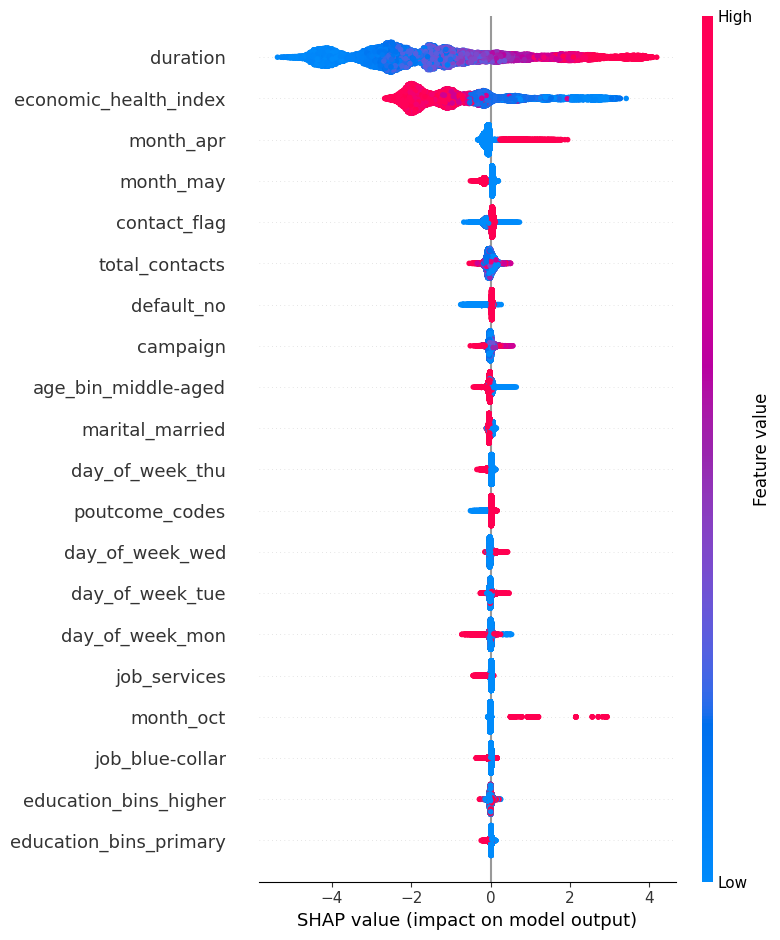

In [207]:
import shap
explainer = shap.TreeExplainer(final_clf)
shap_values = explainer.shap_values(train.to_numpy())
shap.summary_plot(shap_values, train)

Більше всього внесок в передбачення моделі роблять ознаки: duration та еconomic_health_index.

У **duration** нижчі значення зменшують ймовірності підписання депозиту, а більші - збільшують ймовірність. А у **economic_health_index** навпаки: більші значення зменшують ймовірності підписання депозиту. Інші ознаки змішані та описують все про що говорилось.

Більше контактів з клієнтами в **жовтні** та **квітні** збільшує ймовірність успіху, а більше контактів в **травні** навпаки зменшує цю ймовірність, як і у **понеділок**.

Сині точки — низькі значення.
Червоні точки — високі значення.

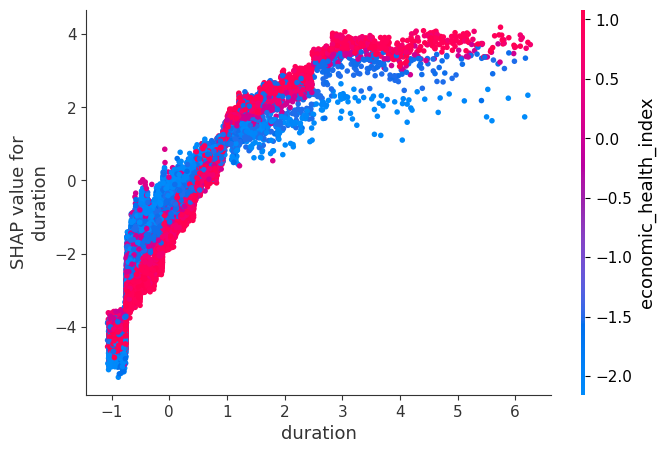

In [209]:
# Візуалізація залежності однієї ознаки
shap.dependence_plot('duration', shap_values, train)

Графік показує нелінійну залежність між duration та economic_health_index. Вплив duration на прогноз не є постійним і змінюється залежно від значення economic_health_index.

При низьких та негативних значеннях duration внесок ознаки в прогноз негативний (нижче нуля). Починаючи з значення duration ≈1, вплив значно зростає і стає позитивним: довші контакти збільшують ймовірність підписання депозиту.

Приблизно після duration ≈3 ефект насичується, і приріст майже не змінює прогноз. Це означає, що після певної тривалості контакту подальше збільшення часу не призводить до значного збільшення ймовірності успіху.

In [210]:
# Вибираємо один запис для пояснення
i = 0  # Номер рядка у тестовому наборі

# Візуалізуємо вплив ознак на прогноз для цього запису
shap.initjs()
shap.force_plot(
    explainer.expected_value,  # Базове значення для імовірності класу 1
    shap_values[1],  # Значення Шеплі для класу 1
    train.iloc[i]  # Ознаки клієнта
)

На цьому графіку можно побачити як кожна ознака вплинула на прогноз моделі для одного конкретного клієнта. Середня ймовірність того, що клієнт підпише депозит = -2.52, що логічно тому, що більше відмов. Ознаки, високі значення яких збільшують ймовірність підписання: f_week_wed (середа), job_retired (пенсіонер) та duration. Сильнійший вплив з низькими значеннями на зменшення ймовірності має ознаки economic_health_index, місяць травень та заборгованість за кредитом.

Тобто клієнт пенсіонер з заборгованістю по кредиту, з яким спілкувались менше середнього в середу травня, має меншу ймовірність підписання депозиту.

# 9. Аналіз записів

Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?

In [211]:
val_pred = final_clf.predict(val.to_numpy())  # Отримання передбачень
errors = val_targets != val_pred            # Виділення помилок

In [212]:
error_df = val[errors]  # DataFrame з помилками
correct_df = val[~errors]  # DataFrame з правильними передбаченнями

In [238]:
# Підрахунок розподілу категоріальних змінних у помилках
categorical_cols = ['poutcome_codes']  # Змінні, які можна аналізувати
# Видалив 'month_apr' з categorical_cols, бо він не підходить для value_counts()
for col in categorical_cols:
    print(f"Розподіл {col} серед помилкових передбачень:")
    print(error_df[col].value_counts(normalize=True) * 100)
    print("\n")

# Аналіз середніх значень числових змінних у правильних і помилкових передбаченнях
numeric_cols = ['duration', 'economic_health_index']
print("Середні значення числових змінних:")
print("Помилкові передбачення:\n", error_df[numeric_cols].mean())
print("Правильні передбачення:\n", correct_df[numeric_cols].mean())

Розподіл poutcome_codes серед помилкових передбачень:
poutcome_codes
1.00   86.23
0.00   13.45
2.00    0.32
Name: proportion, dtype: float64


Середні значення числових змінних:
Помилкові передбачення:
 duration                 1.25
economic_health_index   -0.92
dtype: float64
Правильні передбачення:
 duration                -0.11
economic_health_index    0.08
dtype: float64


Модель найчастіше помиляється, коли poutcome_codes = 1, тобто failure.

duration - частіше помиляється при довших дзвінках.
Можна додати бінування duration (наприклад, short, medium, long)

Коли economic_health_index низький, модель більше помиляється.

Це може означати, що модель не враховує важливість економічних умов.

In [239]:
# Перевіряємо баланс класів у poutcome_codes
class_distribution = df['poutcome_codes'].value_counts(normalize=True) * 100
print("Баланс класів у poutcome_codes (%):")
print(class_distribution)


Баланс класів у poutcome_codes (%):
poutcome_codes
1.00   89.47
0.00   10.52
2.00    0.01
Name: proportion, dtype: float64


Набір даних незбалансований, особливо клас success (0.01). Модель, яка навчається на цих даних, швидше за все буде ігнорувати success і просто передбачати failure у більшості випадків.

Рішення: балансування даних.

Візуалізації розподілу важливих ознак з помилками

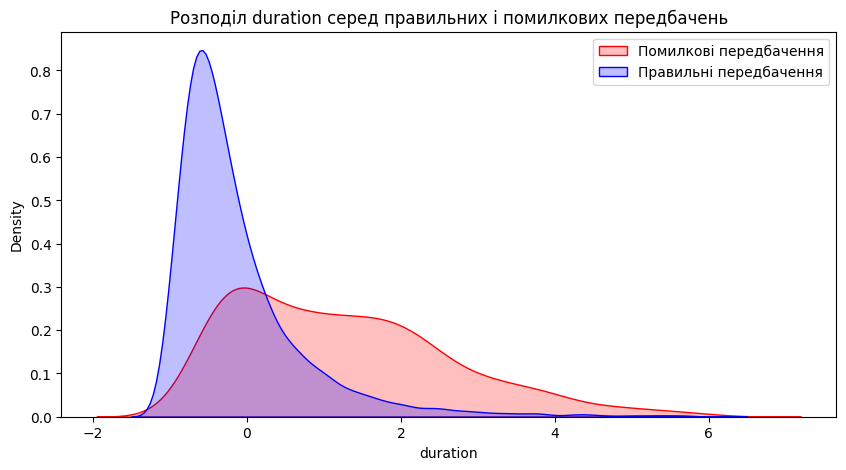

In [235]:
# Візуалізуємо розподіл ознаки "campaign" серед помилкових і правильних передбачень
plt.figure(figsize=(10,5))
sns.kdeplot(error_df['duration'], label="Помилкові передбачення", fill=True, color="red")
sns.kdeplot(correct_df['duration'], label="Правильні передбачення", fill=True, color="blue")
plt.legend()
plt.title("Розподіл duration серед правильних і помилкових передбачень")
plt.show()


In [241]:
print("Медіана duration для помилкових передбачень:", error_df['duration'].median())
print("Медіана duration для правильних передбачень:", correct_df['duration'].median())


Медіана duration для помилкових передбачень: 1.0249568628210861
Медіана duration для правильних передбачень: -0.36903210251256163


Модель помиляється більше на довших дзвінках (де тривалість більша за 1 секунду).

Та краще справляється з короткими дзвінками, де тривалість менш ніж 1 секунда (це видно з негативної медіани для правильних передбачень).

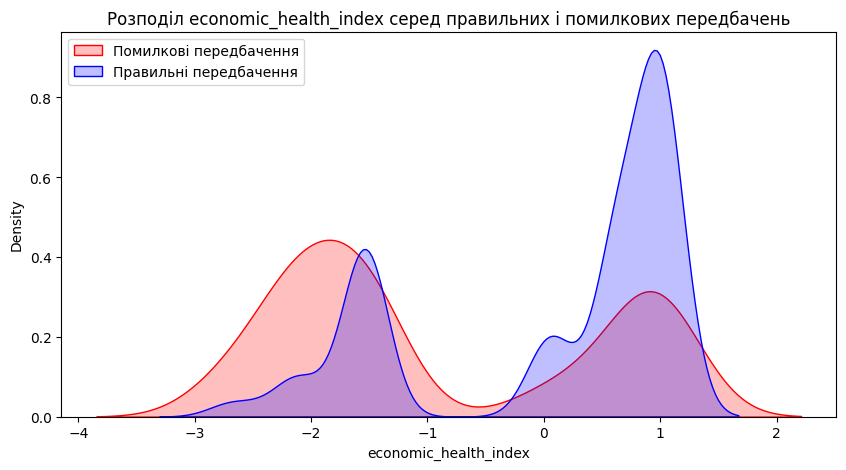

In [236]:
# Візуалізуємо розподіл ознаки "economic_health_index" серед помилкових і правильних передбачень
plt.figure(figsize=(10,5))
sns.kdeplot(error_df['economic_health_index'], label="Помилкові передбачення", fill=True, color="red")
sns.kdeplot(correct_df['economic_health_index'], label="Правильні передбачення", fill=True, color="blue")
plt.legend()
plt.title("Розподіл economic_health_index серед правильних і помилкових передбачень")
plt.show()


In [242]:
print("Медіана economic_health_index для помилкових передбачень:", error_df['economic_health_index'].median())
print("Медіана economic_health_index для правильних передбачень:", correct_df['economic_health_index'].median())

Медіана economic_health_index для помилкових передбачень: -1.5415424579522288
Медіана economic_health_index для правильних передбачень: 0.6276229833563882


Модель більше помиляється на прикладах, де economic_health_index є низьким. Це може свідчити про те, що треба підвищити ваги економічних зміних (emp.var.rate, nr.employed).

In [230]:
probs = final_clf.predict_proba(val.to_numpy())[:, 1]  # Ймовірності класу "yes"
error_probs = probs[errors]  # Ймовірності для помилкових передбачень

print("Середня ймовірність помилкових передбачень:", np.mean(error_probs))

Середня ймовірність помилкових передбачень: 0.42448846


Модель не дуже впевнена у передбаченнях.

Можливо потрібно перебалансувати поріг класифікації, додати нові ознаки, перевірити гіперпараметри моделі та додати регуляризацію, щоб розібратися з перенавчанням. Більш глибоке вивчення помилок доможе зрозуміти як їх усунути.

# Тестування на тестовому наборі

In [271]:
best_params = {
    'colsample_bytree': 0.8,
    'gamma': 0.9,
    'learning_rate': 0.03,
    'max_depth': 9,
    'min_child_weight': 17,
    'n_estimators': 500,
    'reg_alpha': 0.5,
    'reg_lambda': 0.9,
    'subsample': 0.8
}


xgb_clf = xgb.XGBClassifier(
    enable_categorical=True,  # для категорійних ознак
    use_label_encoder=False,  # щоб уникнути попереджень, якщо використовуєте нові версії XGBoost
    missing=np.nan,  # явне вказування пропущених значень
    device='cuda', # Use GPU if available
    **best_params # unpack best_params into the XGBClassifier constructor
)

xgb_clf.fit(train.to_numpy(), train_targets)

train_pred = xgb_clf.predict_proba(train.to_numpy())[:, 1]
val_pred = xgb_clf.predict_proba(val.to_numpy())[:, 1]

# Calculate AUROC for training and validation data
train_auroc = roc_auc_score(train_targets, train_pred)
val_auroc = roc_auc_score(val_targets, val_pred)

print(f"AUROC on training data: {train_auroc}")
print(f"AUROC on validation data: {val_auroc}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:17:40] WARNING: /workspace/src/context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:17:40] WARNING: /workspace/src/context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:17:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUROC on training data: 0.9674016461827823
AUROC on validation data: 0.9450006339788102




---



In [272]:
val_pred = final_clf.predict_proba(val.to_numpy())[:, 1]
val_auroc = roc_auc_score(val_targets, val_pred)
print(f"AUROC на валідаційному наборі: {val_auroc}")

AUROC на валідаційному наборі: 0.9443054971513802


Оцінка моделі на тестовому наборі

In [273]:
test_pred = final_clf.predict_proba(test.to_numpy())[:, 1]
test_auroc = roc_auc_score(test_targets, test_pred)
print(f"AUROC на тестовому наборі: {test_auroc}")

AUROC на тестовому наборі: 0.9438586227339387


AUROC на тестовому наборі: 0.943 - результат перенавчання. Але точність все одно не погана. Треба експерементувати з feature engineering, гіперпараметрами та регуляризацією. Виключення колонки duration модель погіршив. Але для фінальної моделі її треба вилучити.